# Отбор племенных животных

## Описание проекта
Собраны датасеты с поголовьем из которого нужно выбрать представителей с самым вкусным молоком и большим удоем (более 6000 кг в год).  
## Задача
Задача - разработать модель машинного обучения для принятия решений. Задача будет решаться двумя этапами - регрессивный анализ удоев и логистический анализ показателя "вкусности" молока.

## Описание
Предоставлены 3 датасета: 
- ferma_main.csv - данные о стаде на текущий момент.
- ferma_dad.csv - имя папы каждой коровы в стаде.
- cow_buy.csv - данные о стаде на продажу.

1. Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
Признаки в датасете ferma_main.csv можно разделить на группы.
- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
- Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: Удой, кг, Жирность,%, Белок
2. Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.

3. Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, бо

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
* Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
* Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
* Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!ть!лее_2_лет).2_лет).вы, бинарный признак (менее_2_лет, более_2_лет).svого.

In [1]:
# Игнгорирование предупреждений системы
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
! pip install -q phik

In [3]:
# Импорт необходимых билиотек
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score, accuracy_score, 
                            confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve,
                            roc_curve)

import math
import phik

# отображаем все столбцы и до 100 строк
pd.options.display.max_columns = 250
pd.options.display.max_rows = 100
#pd.set_option('display.precision', 2)
pd.options.display.float_format = '{:20.2f}'.format

RANDOM_STATE = 42

## Загрузка данных

In [4]:
ferma_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';', decimal=',') # Данные о стаде на текущий момент
ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';') # Имя  папы каждой коровы в стаде фермемра
cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';', decimal=',') # Данные о коровах для покупки

In [5]:
display(ferma_main.head())
ferma_main.info()
display(ferma_dad.head())
ferma_dad.info()
display(cow_buy.head())
cow_buy.info()

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14.20              1743   
1   2      5529                                  12.80              2138   
2   3      5810                                  14.00              1854   
3   4      5895                                  12.40              2012   
4   5      5302                                  12.80              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                  0.89   Вис Бик Айдиал    Равнинное   
1                                  0.89   Вис Бик Айдиал    Равнинные   
2                                  0.89  РефлешнСоверинг    Холмистое   
3                                  0.89  РефлешнСоверинг    Холмистое   
4                                  0.89   Вис Бик Айдиал    Равнинные   

  порода папы_быка           Жирность,%              Белок,% Вкус молока  \
0           Айдиал                 3.58                 3.08      вкусно   
1          Соверин                 3.54                 3.08      вкусно   
2          Соверин                 3.59                 3.07   не вкусно   
3           Айдиал                 3.40                 3.08   не вкусно   
4          Соверин                 3.73                 3.07      вкусно   

       Возраст  
0  более_2_лет  
1  менее_2_лет  
2  более_2_лет  
3  более_2_лет  
4  менее_2_лет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Порода Тип пастбища порода папы_быка  Имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   

    Текущая_жирность,%  Текущий_уровень_белок,%      Возраст  
0                 3.58                     3.08  более_2_лет  
1                 3.54                     3.08  менее_2_лет  
2                 3.59                     3.07  более_2_лет  
3                 3.40                     3.06  более_2_лет  
4                 3.64                     3.07  более_2_лет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


### Первичное изучение данных

Заголовки таблиц не соответствуют PEP8. Сделаем функция перевода в нижний регистр и замены пробелов на подчеркивания. И применим.

In [6]:
def col_pep8(df):
    '''
    Принимает датафрейм и преобразовывает заголовки к PEP8.
    Переводит заголовки в нижний регистр, заменяет пробелы на подчеркивания.
    '''
    new_names = []
    df.columns = df.columns.str.lower() 
    [new_names.append(col.replace(' ', '_').replace(',', '')) for col in df.columns]
    df.columns = new_names
    return (print('Названия столбцов преобразованы:', new_names))

Применяем, проверяем.

In [7]:
col_pep8(ferma_main)
ferma_main.columns.to_list()

Названия столбцов преобразованы: ['id', 'удой_кг', 'эке_(энергетическая_кормовая_единица)', 'сырой_протеин_г', 'спо_(сахаро-протеиновое_соотношение)', 'порода', 'тип_пастбища', 'порода_папы_быка', 'жирность%', 'белок%', 'вкус_молока', 'возраст']


['id',
 'удой_кг',
 'эке_(энергетическая_кормовая_единица)',
 'сырой_протеин_г',
 'спо_(сахаро-протеиновое_соотношение)',
 'порода',
 'тип_пастбища',
 'порода_папы_быка',
 'жирность%',
 'белок%',
 'вкус_молока',
 'возраст']

Переименовываем названия колонок

In [8]:
ferma_main.columns = ['id', 'удой_кг', 'эке',
       'сырой_протеин_г', 'спо', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность%', 'белок%',
       'вкус_молока', 'возраст']
ferma_main.columns

Index(['id', 'удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность%', 'белок%',
       'вкус_молока', 'возраст'],
      dtype='object')

Проделываем то же самое с другими таблицами

In [9]:
col_pep8(ferma_dad)
col_pep8(cow_buy)
display(ferma_dad.head())
display(cow_buy.head())

Названия столбцов преобразованы: ['id', 'имя_папы']
Названия столбцов преобразованы: ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'текущая_жирность%', 'текущий_уровень_белок%', 'возраст']


id  имя_папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

порода тип_пастбища порода_папы_быка  имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   

     текущая_жирность%  текущий_уровень_белок%      возраст  
0                 3.58                    3.08  более_2_лет  
1                 3.54                    3.08  менее_2_лет  
2                 3.59                    3.07  более_2_лет  
3                 3.40                    3.06  более_2_лет  
4                 3.64                    3.07  более_2_лет

##  Предобработка данных

Для удобного просмотра данных подготовим функцию. 

In [10]:
def descr(df):
    '''
    Функция принимает датафрейм и выдает таблицу ключевых значений 
    по числовым и категориальным столбцам в компактном виде.
    '''
    df_describe = pd.DataFrame()
    for col in df.columns: 
        if df[col].dtypes in df.select_dtypes(include='number').dtypes.unique():
            df_describe[col] = [
                df[col].dtypes,
                df[col].isna().count(),
                df[col].count(),
                df[col].isna().sum(), 
                round(100*df[col].isna().sum()/df[col].isna().count(), 2),
                df[col].nunique(),
                df[col].min(),
                df[col].max(),
                df[col].duplicated().sum(),
                df[col].sort_values().unique()
            ]
        else:
            df_describe[col] = [
            df[col].dtypes,
            df[col].isna().count(),
            df[col].count(),
            df[col].isna().sum(), 
            round(100*df[col].isna().sum()/df[col].isna().count(), 2),
            df[col].nunique(),
            '-', 
            '-',
            df[col].duplicated().sum(),
            df[col].sort_values().unique()
        ]

    df_describe = df_describe.T
    df_describe.columns = ['Тип данных', 'Количество строк', 'Строк без пропусков', 'Количество пропусков', 'Пропуски, %', 'Количество уникальных', 'Минимум', 'Максимум', 'Количество дубликатов', 'Сэмпл']
    df_describe = df_describe.T
    return df_describe

In [11]:
descr(ferma_main)

id  \
Тип данных                                                         int64   
Количество строк                                                     634   
Строк без пропусков                                                  634   
Количество пропусков                                                   0   
Пропуски, %                                                         0.00   
Количество уникальных                                                629   
Минимум                                                                1   
Максимум                                                             629   
Количество дубликатов                                                  5   
Сэмпл                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   

                                                                 удой_кг  \
Тип данных                                                         int64   
Количество строк                                                     634   
Строк без пропусков                                                  634   
Количество пропусков                                                   0   
Пропуски, %                                                         0.00   
Количество уникальных                                                528   
Минимум                                                             5204   
Максимум                                                           45616   
Количество дубликатов                                                106   
Сэмпл                  [5204, 5207, 5213, 5215, 5235, 5242, 5254, 525...   

                                                                     эке  \
Тип данных                                                       float64   
Количество строк                                                     634   
Строк без пропусков                                                  634   
Количество пропусков                                                   0   
Пропуски, %                                                         0.00   
Количество уникальных                                                 55   
Минимум                                                            10.90   
Максимум                                                           16.80   
Количество дубликатов                                                579   
Сэмпл                  [10.9, 11.1, 11.5, 11.7, 11.8, 11.9, 12.0, 12....   

                                                         сырой_протеин_г  \
Тип данных                                                         int64   
Количество строк                                                     634   
Строк без пропусков                                                  634   
Количество пропусков                                                   0   
Пропуски, %                                                         0.00   
Количество уникальных                                                401   
Минимум                                                             1660   
Максимум                                                            2349   
Количество дубликатов                                                233   
Сэмпл                  [1660, 1661, 1662, 1664, 1665, 1666, 1667, 166...   

                                                                     спо  \
Тип данных                                                       float64   
Количество строк                                                     634   
Строк без пропусков                                                  634   
Количество пропусков                                                   0   
Пропуски, %                                                         0.00   
Количество уникальных                                                 12   
Минимум                                                             0.84   
Максимум                                                            0.96   
Количество дубликатов                 

Пропусков нет - хорошо, но есть дубликаты id - посмотрим что в них.

эке, спо, жирность, белок тип данных object - показатели цифровые - переводим во float, перед этим меняем заапятые в числовых значениях на точки.

Есть скрытые дубликаты Равнинное - Равниные, Айдиал - Айдиалл. Приврдим к единообразию.

Смотрим на полные дубликаты- 

In [12]:
# ferma_main[ferma_main.duplicated(['id'])]
ferma_main[ferma_main.duplicated()]

id  удой_кг                  эке  сырой_протеин_г                  спо  \
629  627     5970                14.40             1837                 0.88   
630  627     5970                14.40             1837                 0.88   
631  627     5970                14.40             1837                 0.88   
632  627     5970                14.40             1837                 0.88   
633  627     5970                14.40             1837                 0.88   

              порода тип_пастбища порода_папы_быка            жирность%  \
629  РефлешнСоверинг    Холмистое          Соверин                 3.64   
630  РефлешнСоверинг    Холмистое          Соверин                 3.64   
631  РефлешнСоверинг    Холмистое          Соверин                 3.64   
632  РефлешнСоверинг    Холмистое          Соверин                 3.64   
633  РефлешнСоверинг    Холмистое          Соверин                 3.64   

                  белок% вкус_молока      возраст  
629                 3.08   не вкусно  более_2_лет  
630                 3.08   не вкусно  более_2_лет  
631                 3.08   не вкусно  более_2_лет  
632                 3.08   не вкусно  более_2_лет  
633                 3.08   не вкусно  более_2_лет

Идентичные строки с одинаковым id - просто убираем

In [13]:
ferma_main.drop_duplicates(subset=['id'], keep='first', inplace=True) 

Убираем скрытые дубликаты

In [14]:
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].replace('Равнинные', 'Равнинное')
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал')

Проверяем вторую таблицу

In [15]:
descr(ferma_dad)

id  \
Тип данных                                                         int64   
Количество строк                                                     629   
Строк без пропусков                                                  629   
Количество пропусков                                                   0   
Пропуски, %                                                         0.00   
Количество уникальных                                                629   
Минимум                                                                1   
Максимум                                                             629   
Количество дубликатов                                                  0   
Сэмпл                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   

                                                  имя_папы  
Тип данных                                          object  
Количество строк                                       629  
Строк без пропусков                                    629  
Количество пропусков                                     0  
Пропуски, %                                           0.00  
Количество уникальных                                    4  
Минимум                                                  -  
Максимум                                                 -  
Количество дубликатов                                  625  
Сэмпл                  [Барин, Буйный, Геркулес, Соловчик]

In [16]:
ferma_dad[ferma_dad.duplicated()]

Empty DataFrame
Columns: [id, имя_папы]
Index: []

Здесь пропусков нет, у всего стада в таблицк 4 папы, типы данных правильные. Полных дубликатоов нет.

Смотрим третью таблицу

In [17]:
descr(cow_buy)

порода  \
Тип данных                                        object   
Количество строк                                      20   
Строк без пропусков                                   20   
Количество пропусков                                   0   
Пропуски, %                                         0.00   
Количество уникальных                                  2   
Минимум                                                -   
Максимум                                               -   
Количество дубликатов                                 18   
Сэмпл                  [Вис Бик Айдиал, РефлешнСоверинг]   

                                 тип_пастбища     порода_папы_быка  \
Тип данных                             object               object   
Количество строк                           20                   20   
Строк без пропусков                        20                   20   
Количество пропусков                        0                    0   
Пропуски, %                              0.00                 0.00   
Количество уникальных                       2                    2   
Минимум                                     -                    -   
Максимум                                    -                    -   
Количество дубликатов                      18                   18   
Сэмпл                  [равнинное, холмистое]    [Айдиал, Соверин]   

                                                  имя_папы  \
Тип данных                                          object   
Количество строк                                        20   
Строк без пропусков                                     20   
Количество пропусков                                     0   
Пропуски, %                                           0.00   
Количество уникальных                                    4   
Минимум                                                  -   
Максимум                                                 -   
Количество дубликатов                                   16   
Сэмпл                  [Барин, Буйный, Геркулес, Соловчик]   

                                                       текущая_жирность%  \
Тип данных                                                       float64   
Количество строк                                                      20   
Строк без пропусков                                                   20   
Количество пропусков                                                   0   
Пропуски, %                                                         0.00   
Количество уникальных                                                 12   
Минимум                                                             3.34   
Максимум                                                            3.77   
Количество дубликатов                                                  8   
Сэмпл                  [3.34, 3.4, 3.42, 3.54, 3.57, 3.58, 3.59, 3.63...   

                                                  текущий_уровень_белок%  \
Тип данных                                                       float64   
Количество строк                                                      20   
Строк без пропусков                                                   20   
Количество пропусков                                                   0   
Пропуски, %                                                         0.00   
Количество уникальных                                                 12   
Минимум                                                             3.05   
Максимум                                                            3.08   
Количество дубликатов                                                  8   
Сэмпл                  [3.046, 3.053, 3.055, 3.061, 3.065, 3.069, 3.0...   

                                          возраст  
Тип данных                                 object  
Количество строк                               20  
Строк без пропусков                            20  
Количество пропусков                            0  
П

В таблице представлены всего 2 породы, два вида пастбища, 4 папы. Тип пастбища тут не с большой буквы. Заменим чтобы было так же как в основном датафрейме.

In [18]:
cow_buy['тип_пастбища'] = cow_buy['тип_пастбища'].replace('равнинное', 'Равнинное')
cow_buy['тип_пастбища'] = cow_buy['тип_пастбища'].replace('холмистое', 'Холмистое')

Проверяем на полные дубликаты

In [19]:
cow_buy[cow_buy.duplicated()]

порода тип_пастбища порода_папы_быка  имя_папы  \
6    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
8   РефлешнСоверинг    Равнинное          Соверин     Барин   
14  РефлешнСоверинг    Равнинное          Соверин     Барин   
19  РефлешнСоверинг    Равнинное           Айдиал    Буйный   

      текущая_жирность%  текущий_уровень_белок%      возраст  
6                  3.58                    3.08  более_2_лет  
8                  3.59                    3.07  более_2_лет  
14                 3.59                    3.07  более_2_лет  
19                 3.64                    3.07  более_2_лет

Вполне  допустимо - такие совпадения могут быть с одинаковой родословной и показателями.

Предобработка данных завершена, переходим к исследовательскому анализу

## Исследовательский анализ

Для удобства делаем функцию отображения распределений числовых параметров.

In [20]:
def hist_box(df, col, bins='auto'):
    '''
    Принимает датафрейм и колонку по которой нужно нарисовать гистограмму и ящик с усами.
    '''
    fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10,5))
    fig.suptitle(str.upper(col))
    ax0 = sns.histplot(ax=axes[0], data=df, x=col, kde=True, bins=bins)
    ax1 = sns.boxplot(ax=axes[1], data=df, x=col, orient='h');
    ax0.set_ylabel('Частота')
    ax1.set_ylabel('Количество')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

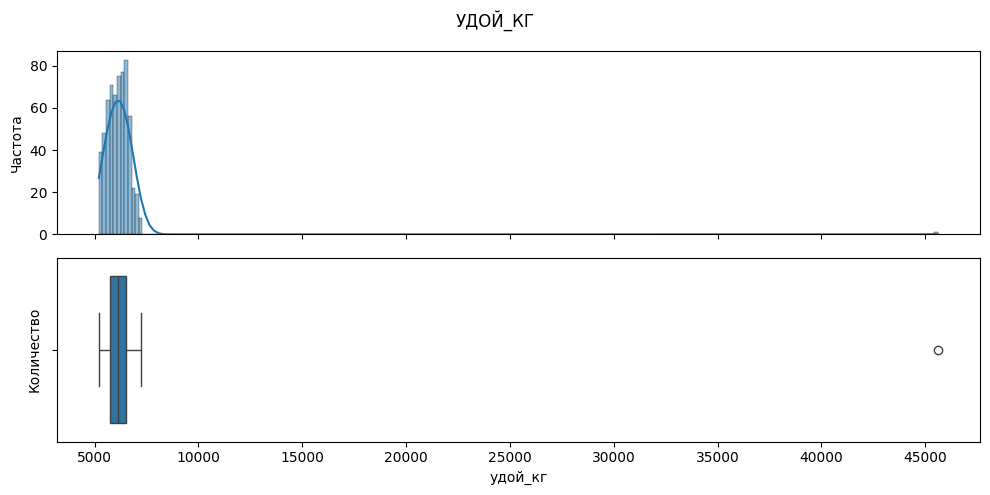

In [21]:
hist_box(ferma_main, 'удой_кг')

Есть выбросы. Посмотрим что там и убираем

In [22]:
df = ferma_main.copy()
df['удой_кг'].describe()

count                 629.00
mean                 6188.75
std                  1644.80
min                  5204.00
25%                  5751.00
50%                  6133.00
75%                  6501.00
max                 45616.00
Name: удой_кг, dtype: float64

In [23]:
def outliers_delete_iqr(df, col):
    '''
    Удаление значений за пределами 1,5 * IQR.
    Аргументы: датафрейм и колонка данных.
    '''
    q_low = df[col].quantile(0.25)
    q_hi  = df[col].quantile(0.75)
    iqr = q_hi - q_low
    df_filtered = df[(df[col] < q_hi+1.5*iqr) & (df[col] > q_low-1.5*iqr)]
    return df_filtered

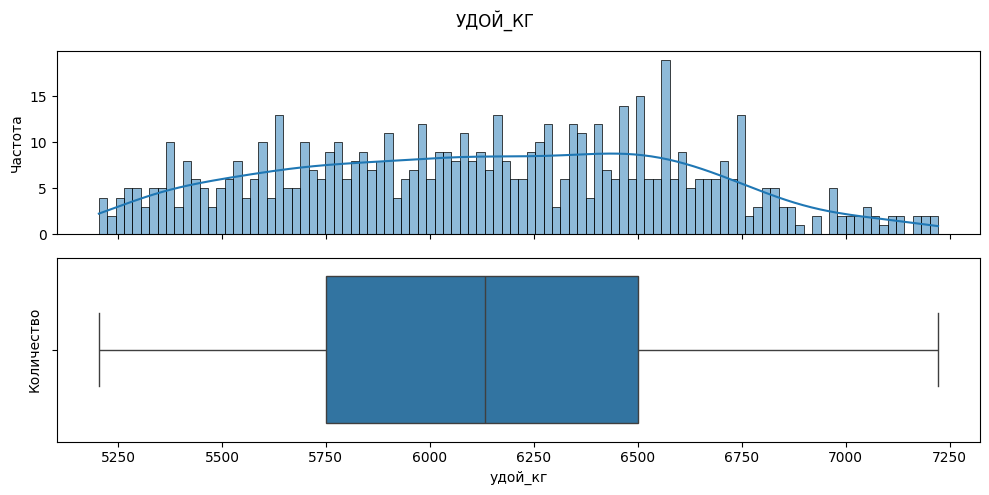

count                 628.00
mean                 6125.97
std                   475.86
min                  5204.00
25%                  5749.75
50%                  6132.50
75%                  6501.00
max                  7222.00
Name: удой_кг, dtype: float64

In [24]:
df = outliers_delete_iqr(df, 'удой_кг')
hist_box(df, 'удой_кг', 100)
df['удой_кг'].describe()

Выброс удалили. Перезаписываем датафрейм без выброса в удоях.

In [25]:
ferma_main = df

In [26]:
ferma_main.describe()

id              удой_кг                  эке  \
count               628.00               628.00               628.00   
mean                315.47              6125.97                14.55   
std                 181.48               475.86                 1.30   
min                   1.00              5204.00                10.90   
25%                 158.75              5749.75                13.50   
50%                 315.50              6132.50                14.70   
75%                 472.25              6501.00                15.60   
max                 629.00              7222.00                16.80   

           сырой_протеин_г                  спо            жирность%  \
count               628.00               628.00               628.00   
mean               1923.76                 0.91                 3.60   
std                 182.83                 0.03                 0.17   
min                1660.00                 0.84                 2.99   
25%                1771.75                 0.89                 3.59   
50%                1888.00                 0.93                 3.65   
75%                2062.25                 0.94                 3.72   
max                2349.00                 0.96                 3.75   

                    белок%  
count               628.00  
mean                  3.08  
std                   0.00  
min                   3.07  
25%                   3.07  
50%                   3.08  
75%                   3.08  
max                   3.08

Определяем все числовые признаки и строим графики распределения.

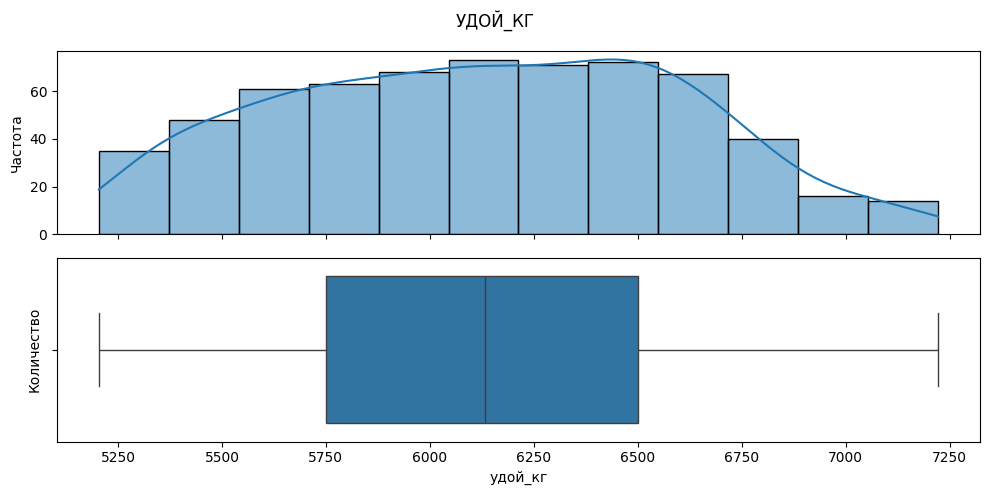

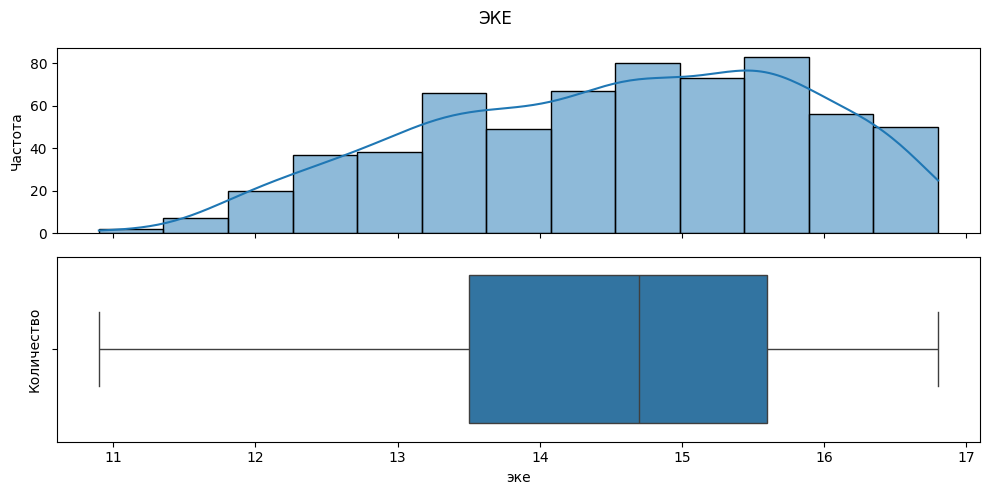

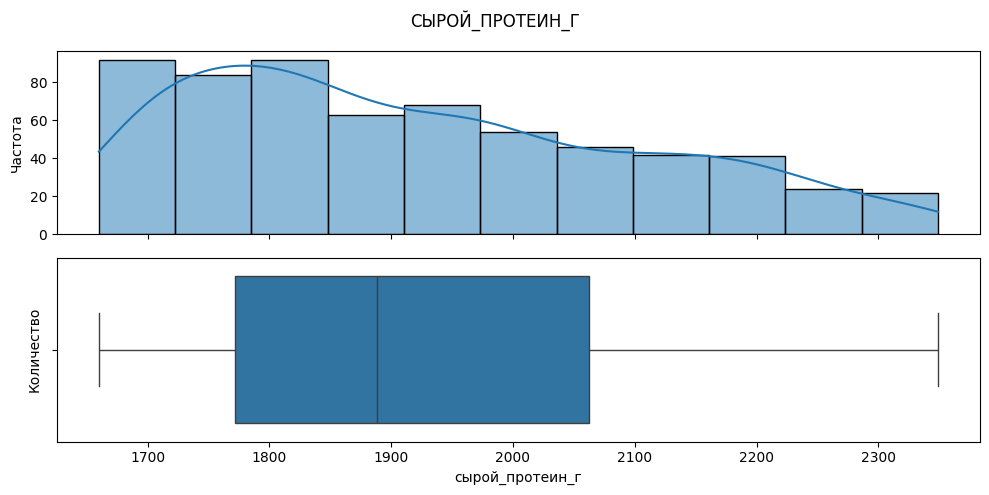

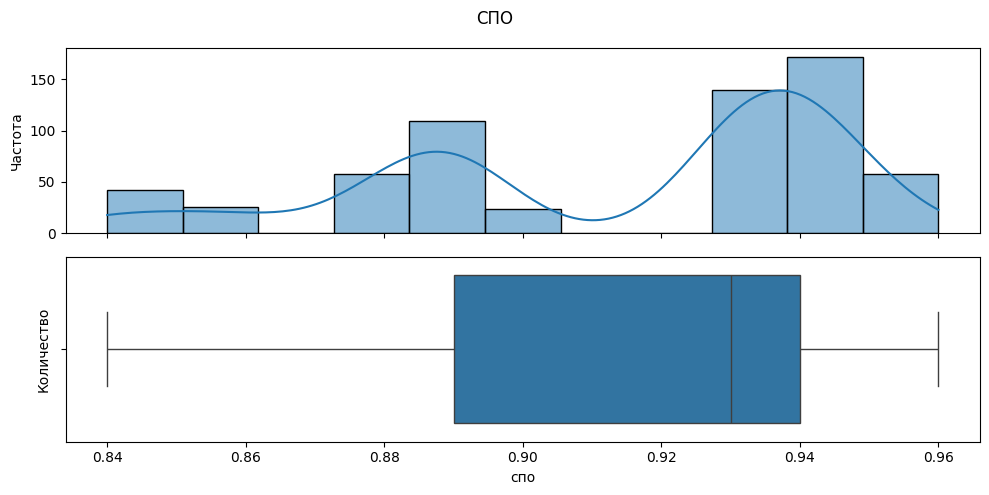

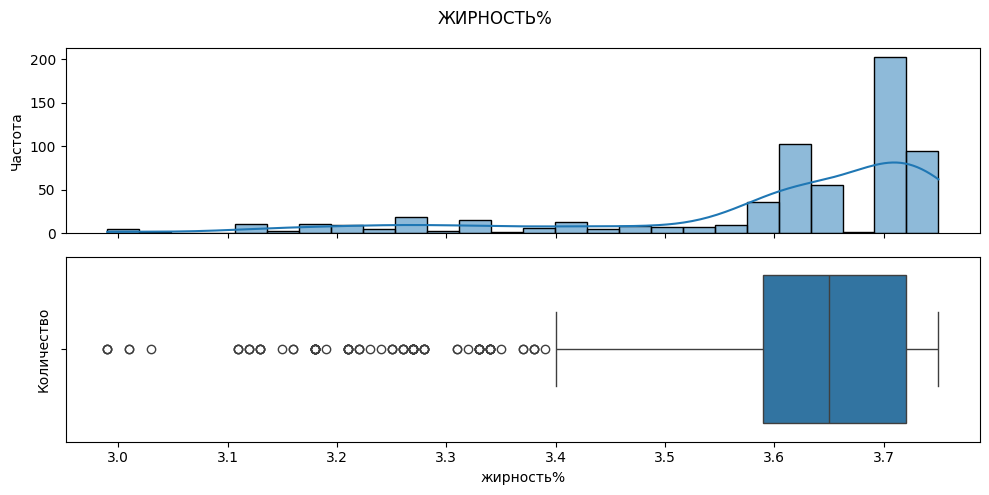

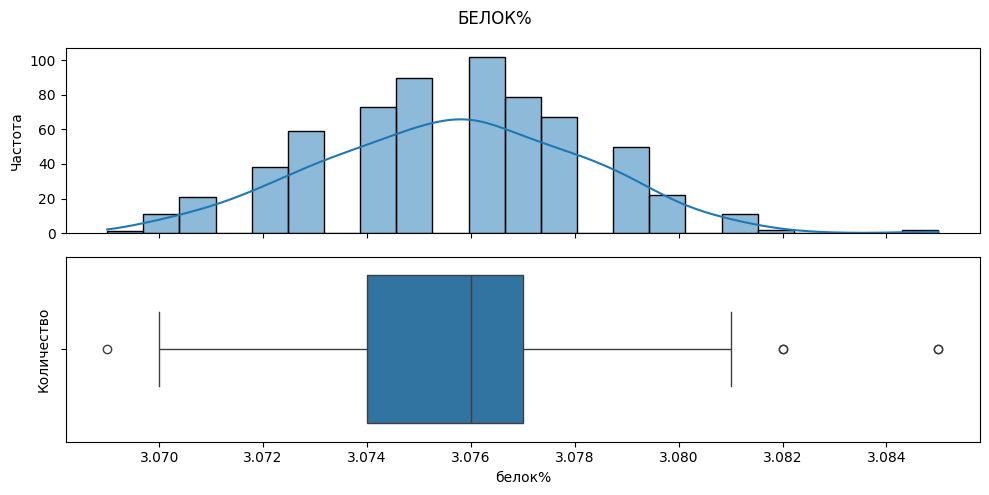

In [27]:
num_cols = ferma_main.select_dtypes(include='number').columns.drop('id').tolist()
for col in num_cols:
    hist_box(ferma_main, col)

Сырой протеин, ЭКЕ, УДОЙ выбросы отсутствуют.
У Белка, жирности есть выбросы. Но это не страшно - для прогноза удоев их использовать не будем, поскольку они производные от уловий кормления, породы... То есть они на удой не влияют.
У СПО есть две вершины (бимодальность) - можно разделить показатель на 2 группы.

Строим графики для категориальных признаков с помощью функции.

In [28]:
def bar_pie(df, col):
    '''
    Столбчатая и круговая диаграмма для категориальных признаков.
    Функция принимает датафрейм и колонку.
    '''
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    colors = sns.color_palette('Paired')
    sns.countplot(x=col, data=df, ax=axes[0])
    plt.pie(df[col].value_counts(),
                labels=df[col].value_counts().index, colors=colors, autopct="%0.1f%%")
    f = fig.suptitle(str.upper(col))
    plt.show()

Находим все колонки с категориалными признаками.

In [29]:
cat_cols = ferma_main.select_dtypes(exclude='number').columns.tolist()
cat_cols

['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']

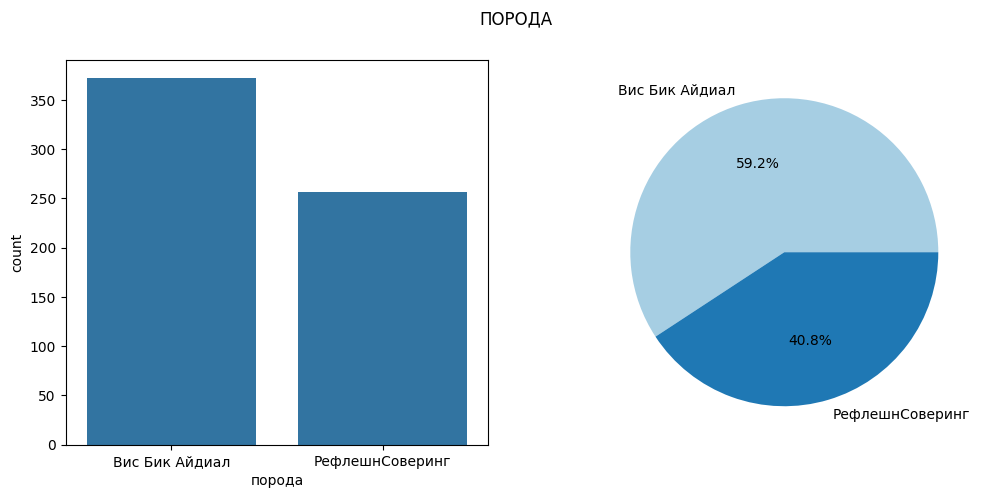

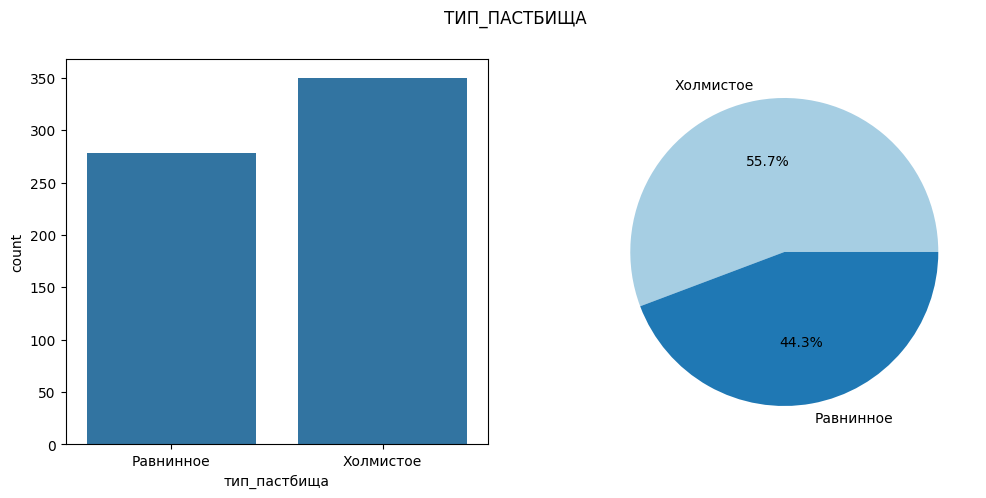

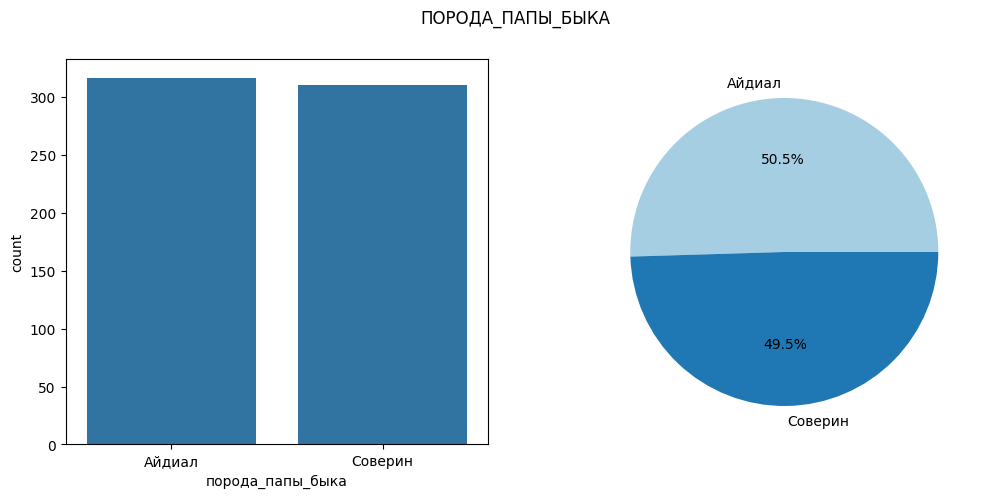

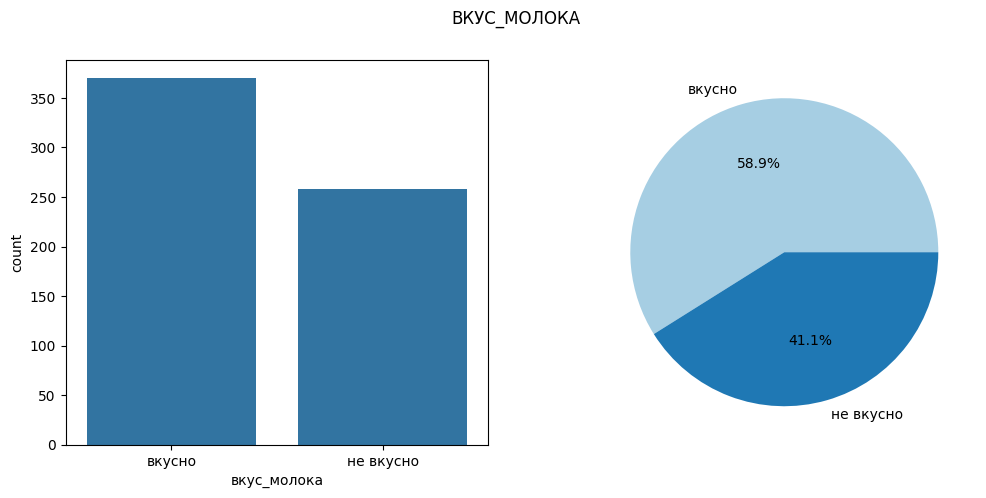

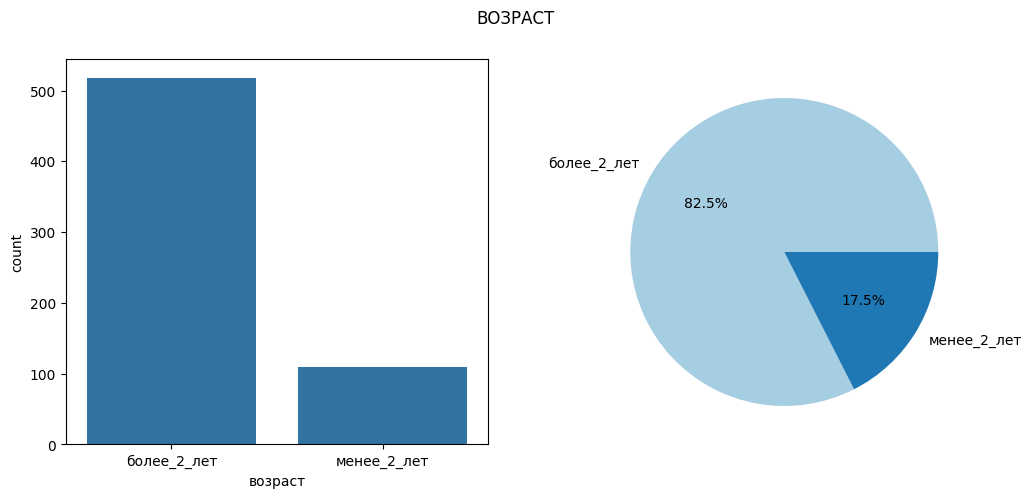

In [30]:
for col in cat_cols:
    bar_pie(ferma_main, col)

Порода - распределение 60х40%, тип пастбища 55х45%, папы-быки - количество детей одинаково в выборке, вкус молока - у 58% вкусное, возраст более 2 лет - в 83%. Глубоких выводов сделать не выйдет. Поэтому построим сравнительные графики в зависимости от типа пастбища. Для ускорения возьмем часть данных (frac=0.2).

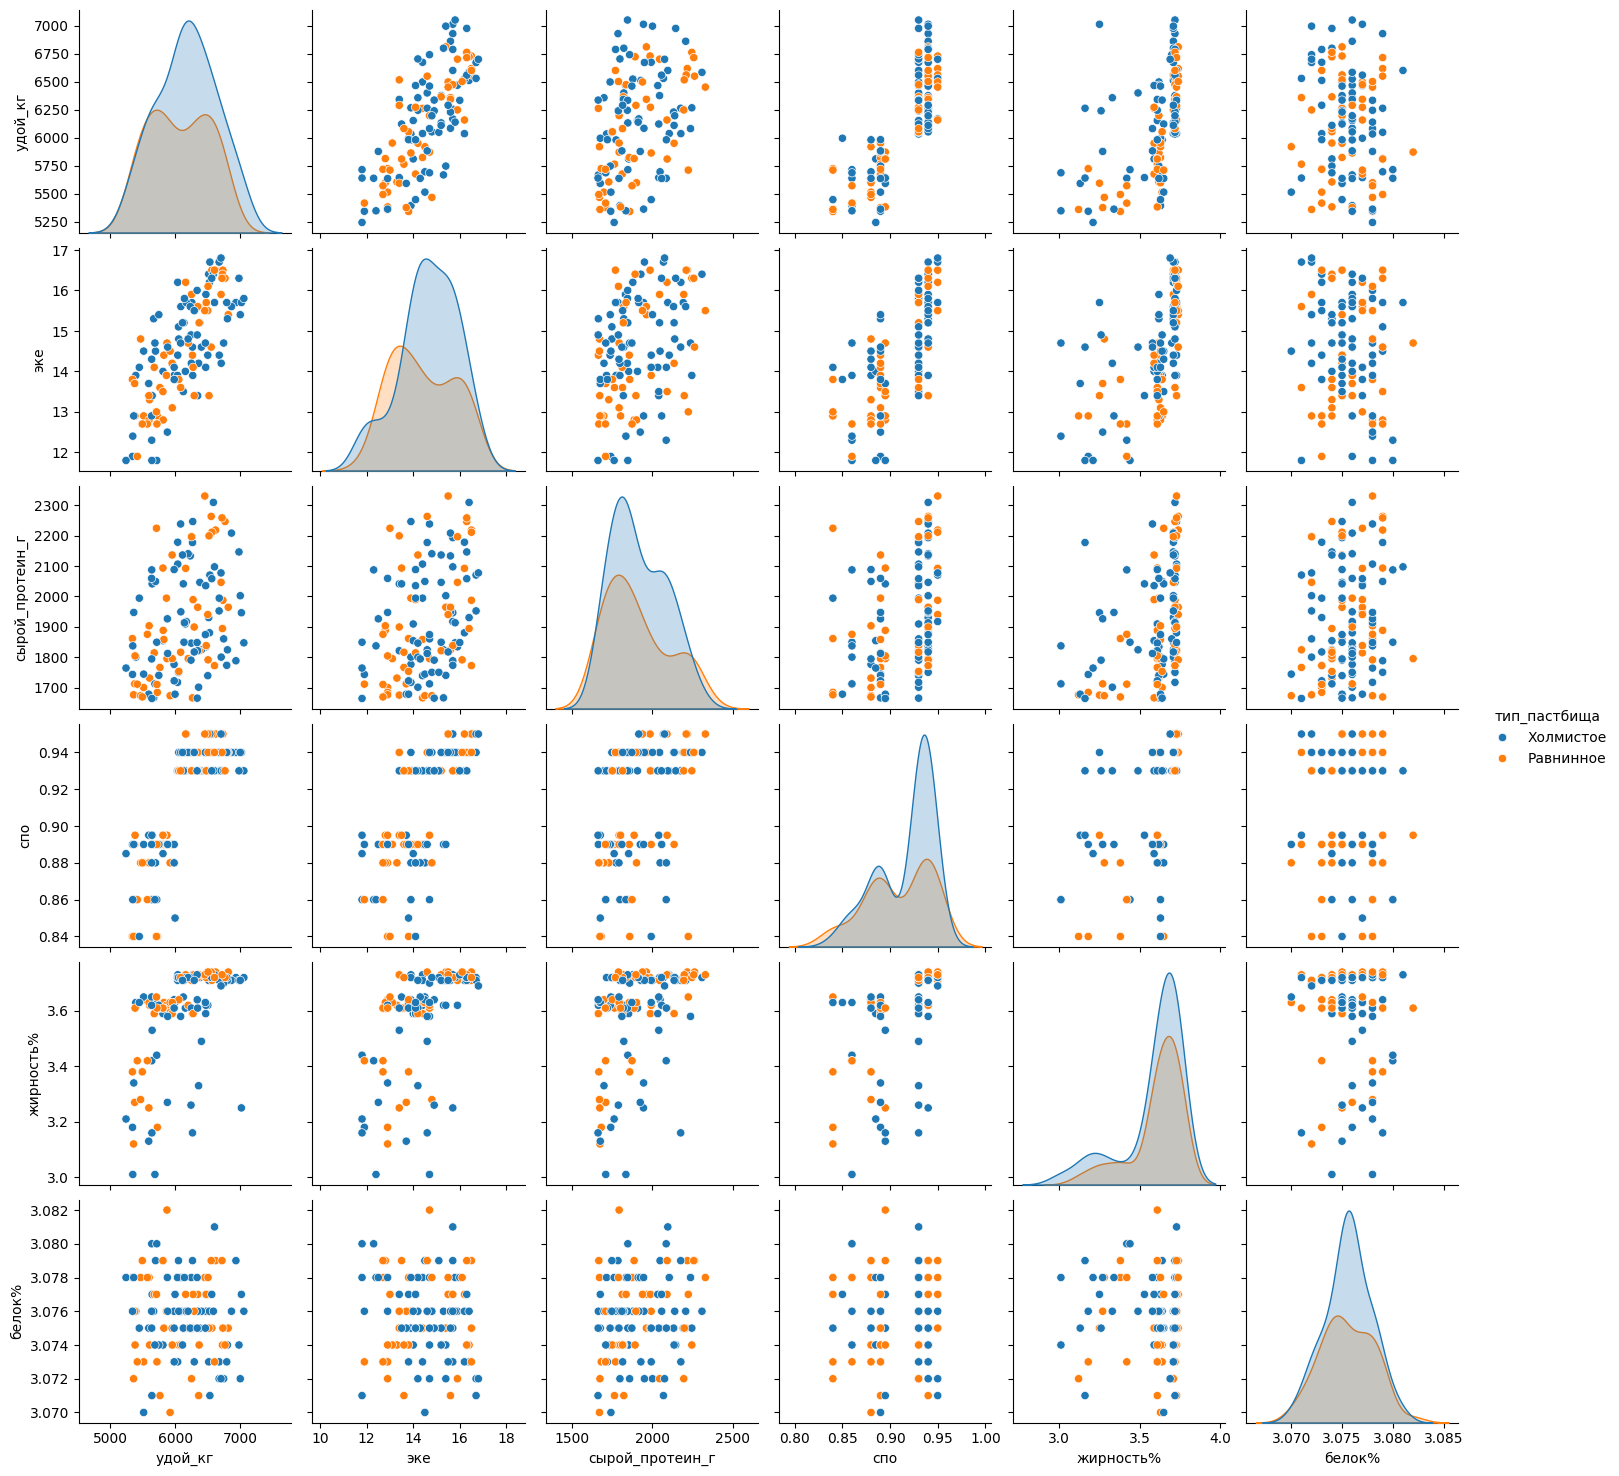

In [31]:
sns.pairplot(ferma_main[[*num_cols, 'тип_пастбища']].sample(frac=0.2, random_state=RANDOM_STATE), hue='тип_пастбища')
plt.show()

Видна близкая к линейной зависимость удой - ЭКЕ, удой - сырой протеин тоже похоже на прямую. СПО - делится на две отдельные группы по показателям.

Построим сравнительные графики в зависимости от типа породы

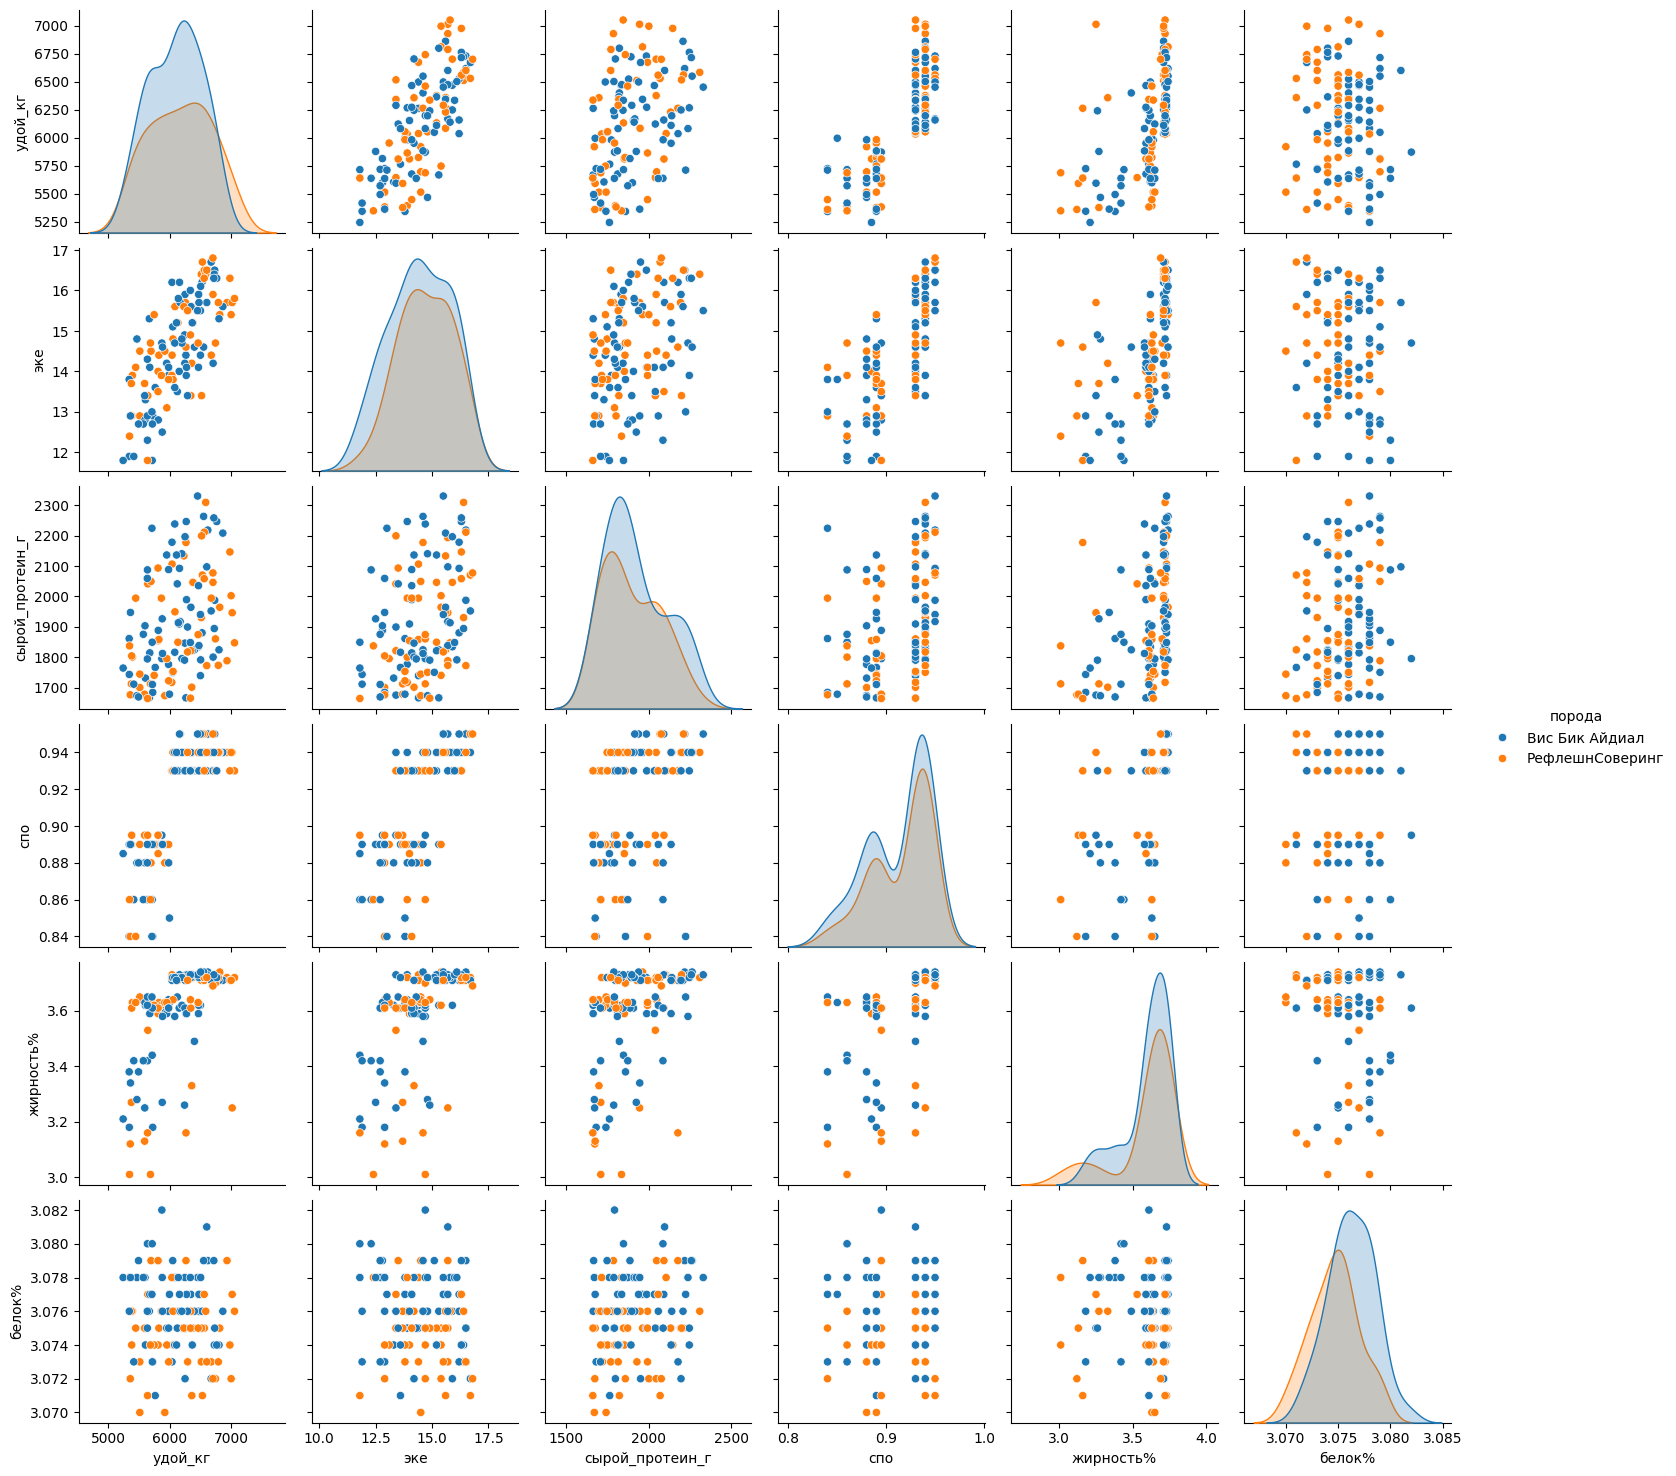

In [32]:
sns.pairplot(ferma_main[[*num_cols, 'порода']].sample(frac=0.2, random_state=RANDOM_STATE), hue='порода')
plt.show()

Построим сравнительные графики в зависимости от породы папы быка

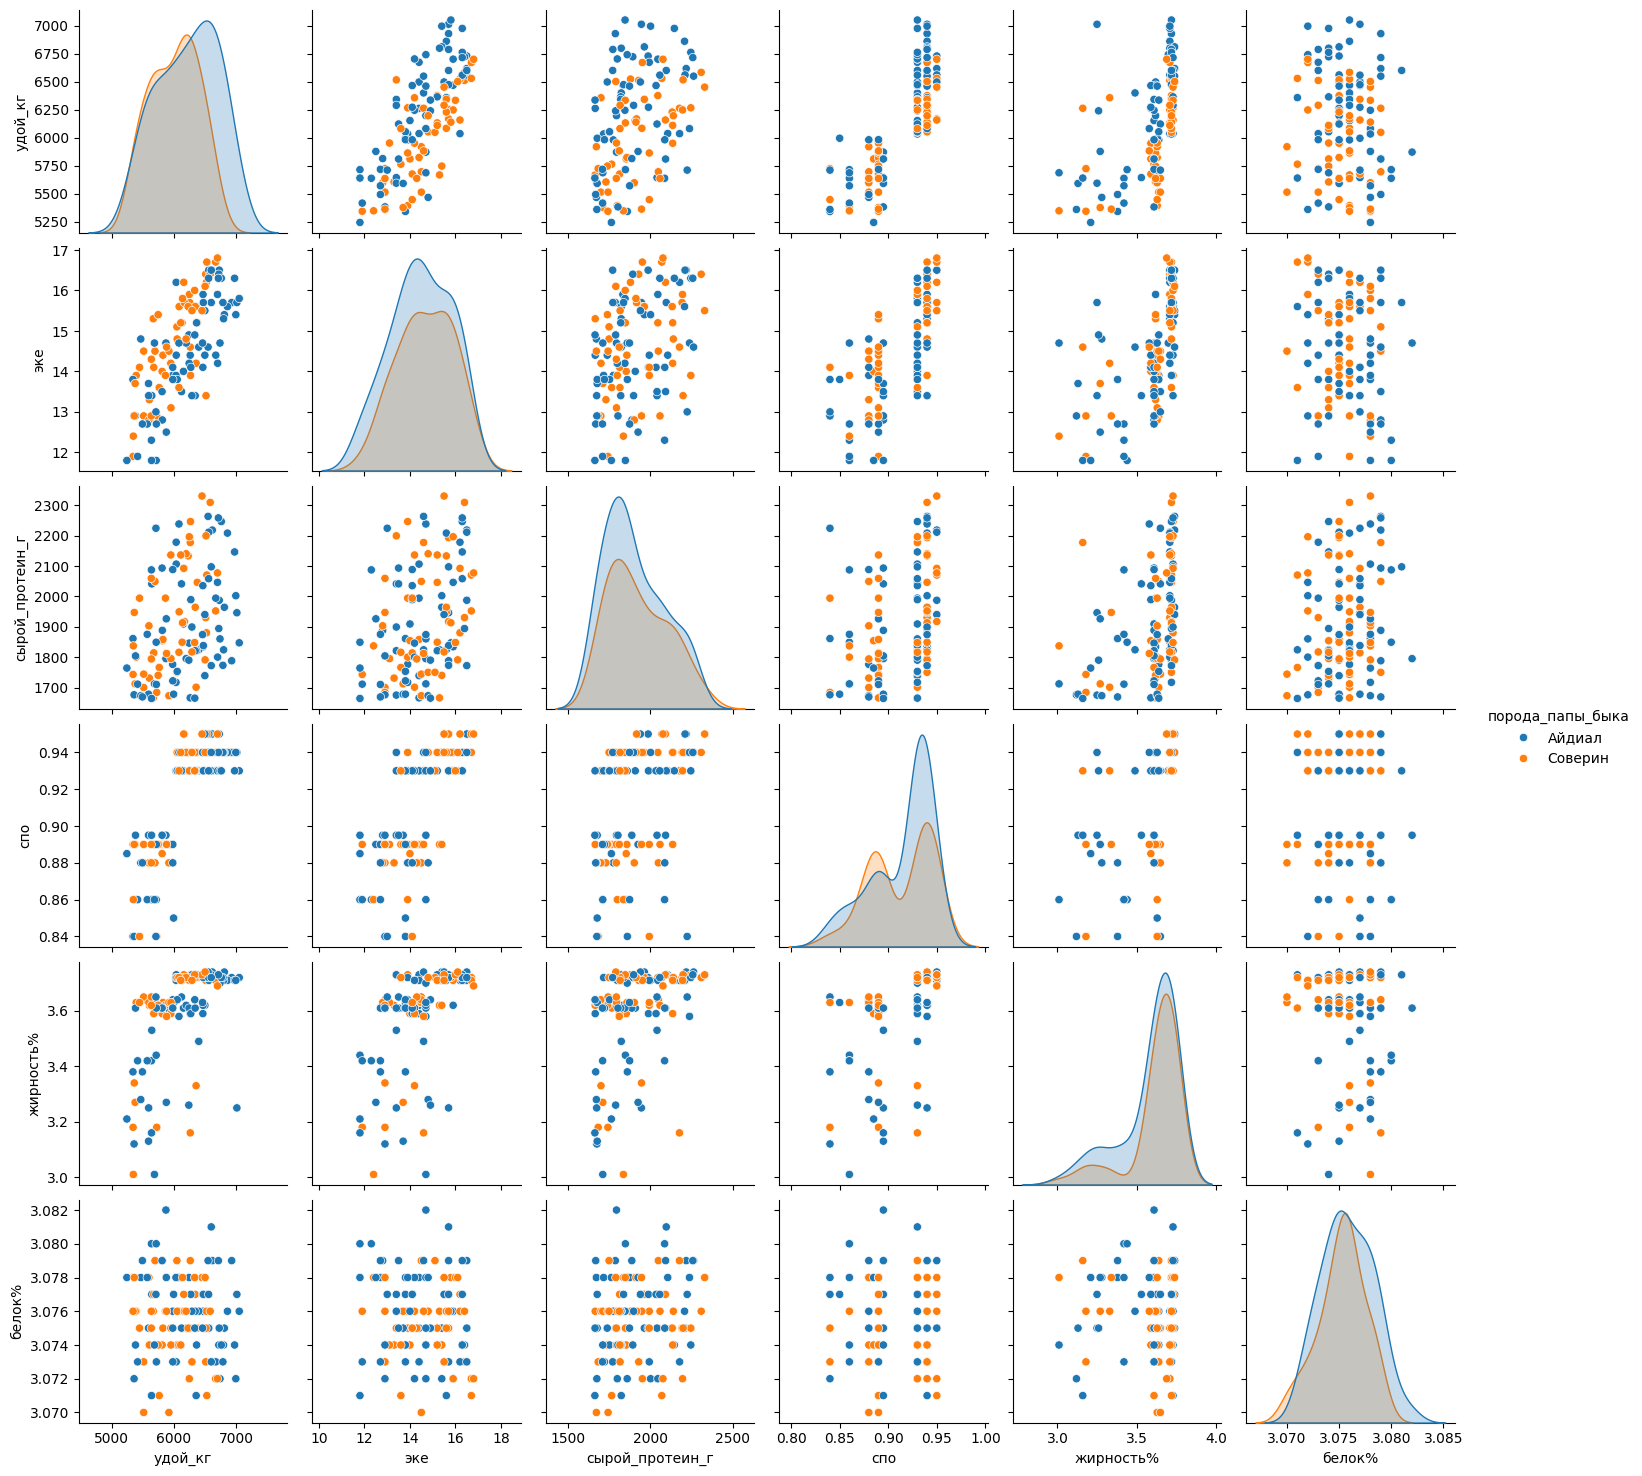

In [33]:
sns.pairplot(ferma_main[[*num_cols, 'порода_папы_быка']].sample(frac=0.2, random_state=RANDOM_STATE), hue='порода_папы_быка')
plt.show()

Построим сравнительные графики в зависимости от возраста 

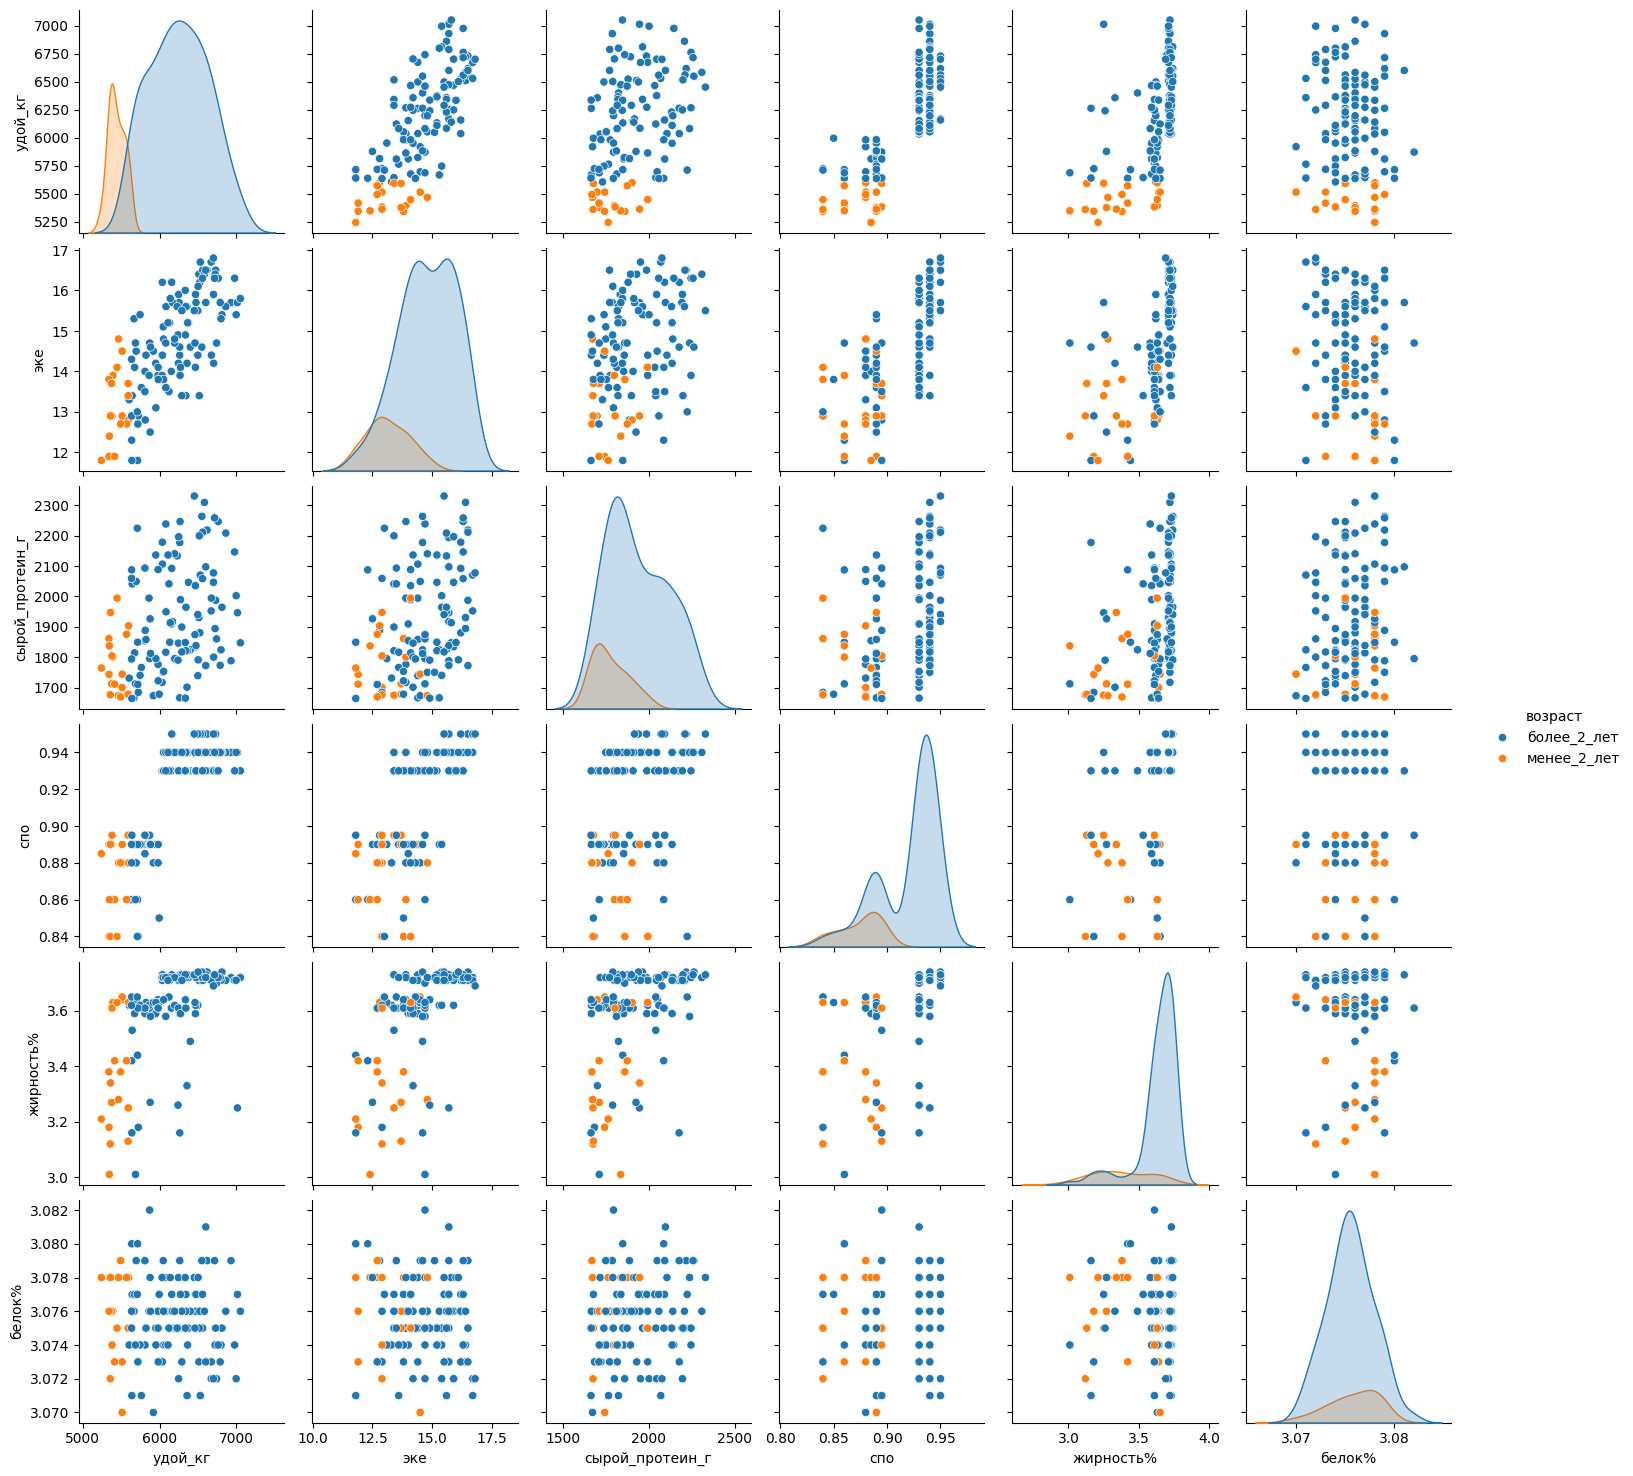

In [34]:
sns.pairplot(ferma_main[[*num_cols, 'возраст']].sample(frac=0.2, random_state=RANDOM_STATE), hue='возраст')
plt.show()

Деление по возрасту наиболее наглядно говорит о том, что в основном удой и другие качественные показатели выше у коров старше 2 лет.

## Корреляционный анализ

Изучим взаимосвязи признаков в датасете ferma_main

Рассчитаем коэффициенты корреляции Спирмена между всеми числовыми признаками.

In [35]:
ferma_main[[*num_cols]].corr(method='spearman')

удой_кг                  эке  \
удой_кг                         1.00                 0.77   
эке                             0.77                 1.00   
сырой_протеин_г                 0.44                 0.38   
спо                             0.79                 0.74   
жирность%                       0.69                 0.69   
белок%                         -0.01                -0.01   

                     сырой_протеин_г                  спо  \
удой_кг                         0.44                 0.79   
эке                             0.38                 0.74   
сырой_протеин_г                 1.00                 0.49   
спо                             0.49                 1.00   
жирность%                       0.39                 0.70   
белок%                          0.23                 0.11   

                           жирность%               белок%  
удой_кг                         0.69                -0.01  
эке                             0.69                -0.01  
сырой_протеин_г                 0.39                 0.23  
спо                             0.70                 0.11  
жирность%                       1.00                 0.04  
белок%                          0.04                 1.00

Построим тепловую карту корреляции и сделаем первые выводы о зависимости показателей

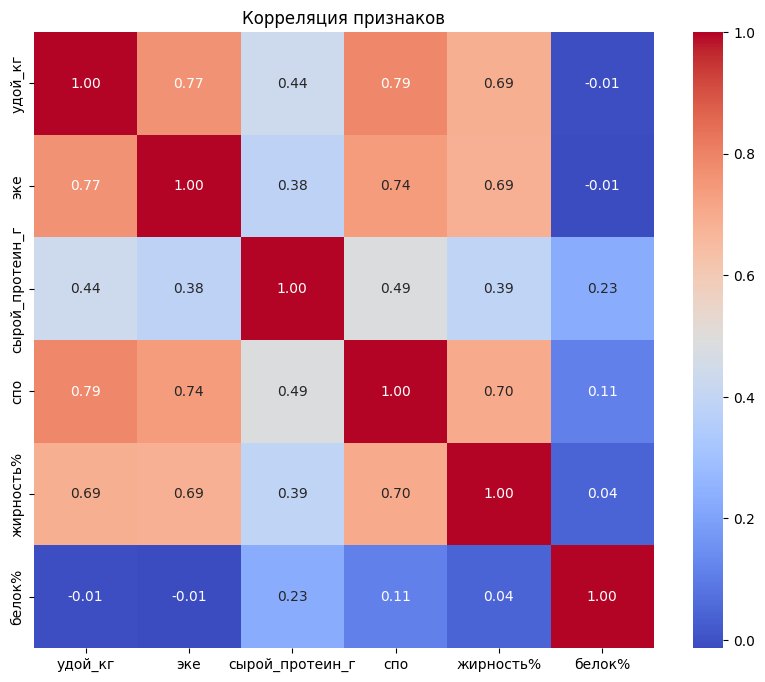

In [36]:
plt.figure(figsize=(10,8))
fig = sns.heatmap(ferma_main[[*num_cols]].corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm')
fig.set_title('Корреляция признаков')
plt.show()

ЭКЕ, сырой протеин и СПО - показатели корма, которые влияют на показатели молока (удой, белок и жирность). Для классификации будем руководствоваться шкалой Чеддока.

- ЭКЕ сильно влияет на удой, средне влияет на жирность, 
- Сырой протеин влияет на удой и жирность слабо, на белок очень слабо, 
- СПО влияет на удой сильно, на жирность средне

У показателей Белок и Жирность были выбросы. Убираем их и заново смотрим корреляцию

In [37]:
descr(ferma_main)

id  \
Тип данных                                                         int64   
Количество строк                                                     628   
Строк без пропусков                                                  628   
Количество пропусков                                                   0   
Пропуски, %                                                         0.00   
Количество уникальных                                                628   
Минимум                                                                1   
Максимум                                                             629   
Количество дубликатов                                                  0   
Сэмпл                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   

                                                                 удой_кг  \
Тип данных                                                         int64   
Количество строк                                                     628   
Строк без пропусков                                                  628   
Количество пропусков                                                   0   
Пропуски, %                                                         0.00   
Количество уникальных                                                527   
Минимум                                                             5204   
Максимум                                                            7222   
Количество дубликатов                                                101   
Сэмпл                  [5204, 5207, 5213, 5215, 5235, 5242, 5254, 525...   

                                                                     эке  \
Тип данных                                                       float64   
Количество строк                                                     628   
Строк без пропусков                                                  628   
Количество пропусков                                                   0   
Пропуски, %                                                         0.00   
Количество уникальных                                                 54   
Минимум                                                            10.90   
Максимум                                                           16.80   
Количество дубликатов                                                574   
Сэмпл                  [10.9, 11.1, 11.7, 11.8, 11.9, 12.0, 12.1, 12....   

                                                         сырой_протеин_г  \
Тип данных                                                         int64   
Количество строк                                                     628   
Строк без пропусков                                                  628   
Количество пропусков                                                   0   
Пропуски, %                                                         0.00   
Количество уникальных                                                401   
Минимум                                                             1660   
Максимум                                                            2349   
Количество дубликатов                                                227   
Сэмпл                  [1660, 1661, 1662, 1664, 1665, 1666, 1667, 166...   

                                                                     спо  \
Тип данных                                                       float64   
Количество строк                                                     628   
Строк без пропусков                                                  628   
Количество пропусков                                                   0   
Пропуски, %                                                         0.00   
Количество уникальных                                                 12   
Минимум                                                             0.84   
Максимум                                                            0.96   
Количество дубликатов                 

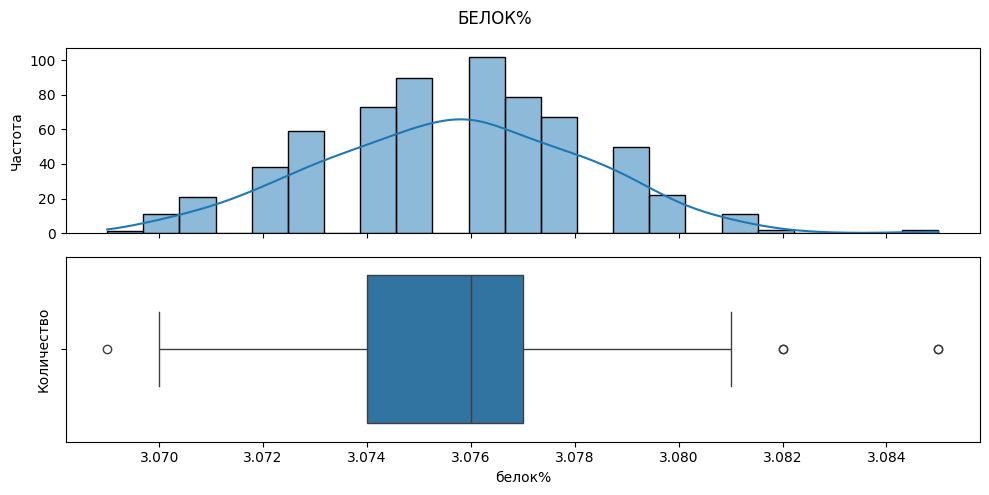

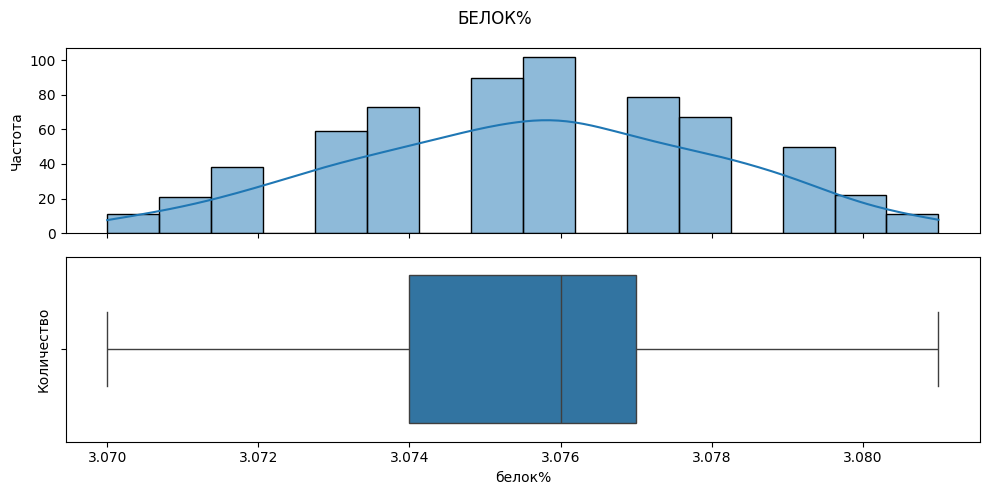

In [38]:
hist_box(ferma_main, 'белок%')
df = outliers_delete_iqr(ferma_main, 'белок%')
hist_box(df, 'белок%')
# ferma_main = df

In [39]:
ferma_main = df

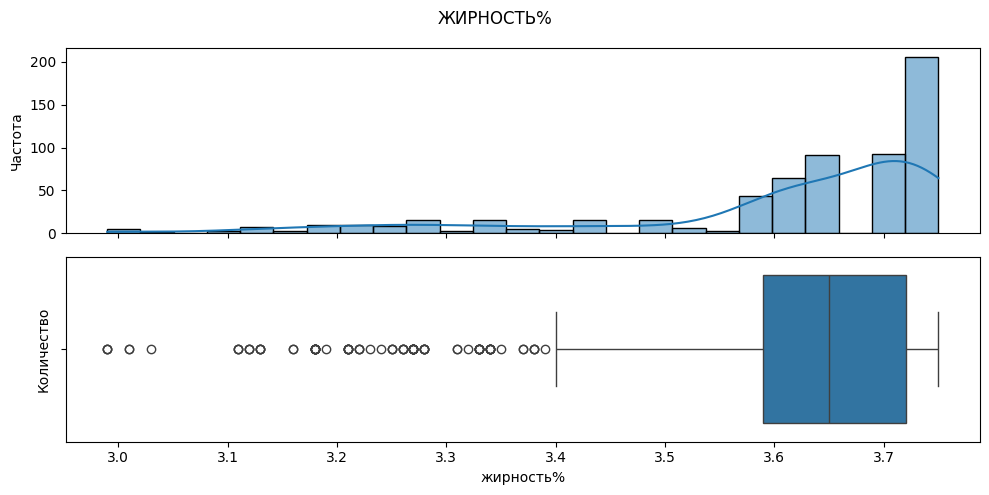

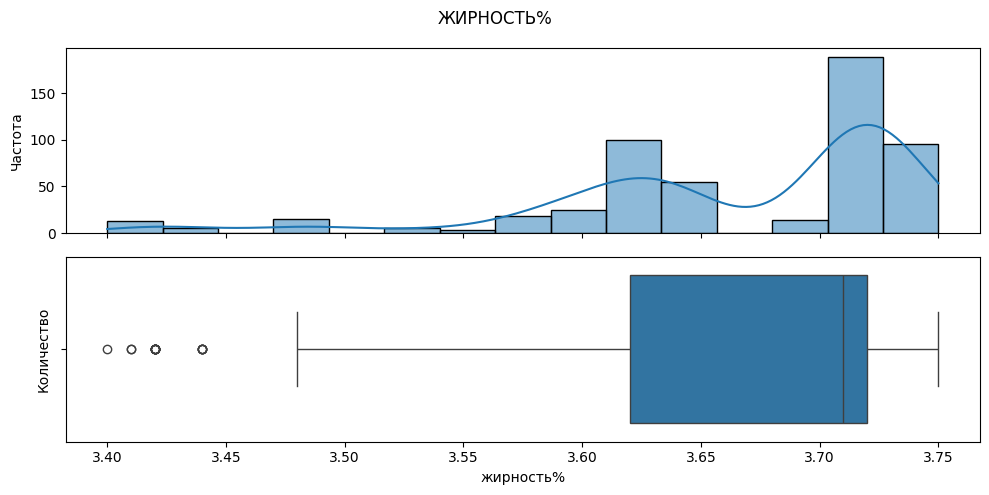

In [40]:
hist_box(ferma_main, 'жирность%')
df = outliers_delete_iqr(ferma_main, 'жирность%')
hist_box(df, 'жирность%')
ferma_main = df

У жирности еще остались выбросы. Но не убираем, так как это график уже исправленных показателей. Если будем убирать то будут данные затираться. Снова строим корреляцию.

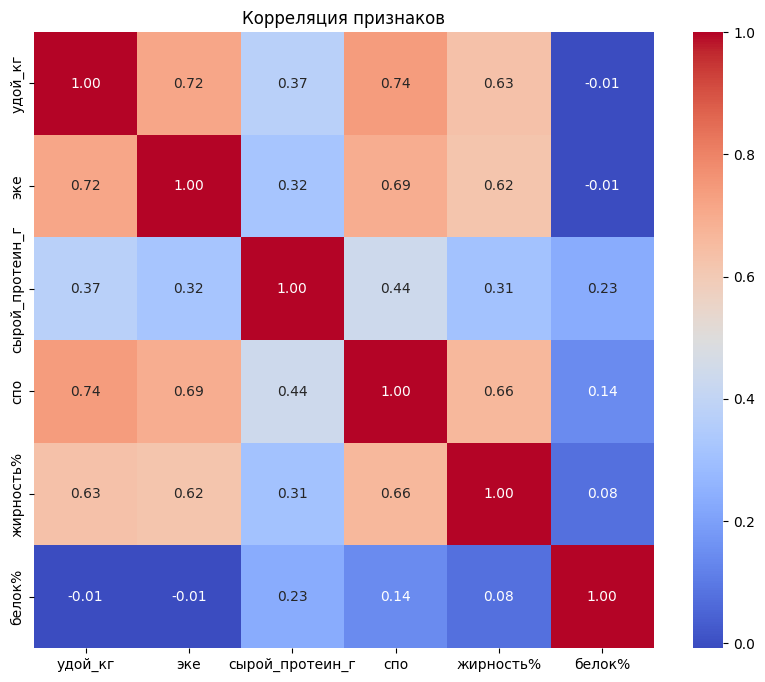

In [41]:
plt.figure(figsize=(10,8))
fig = sns.heatmap(ferma_main[[*num_cols]].corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm') 
fig.set_title('Корреляция признаков')
plt.show()

Влияние выбросов уменьшилось - значение корреляции снизилось. И больше всего влияют на удой - ЭКЕ и СПО. У жирности тоже есть корреляция с удоем, но я ее не буду брать в расчет, поскольку этот показатель тоже производный от показателей корма.

Посчитаем корреляцию Спирмена

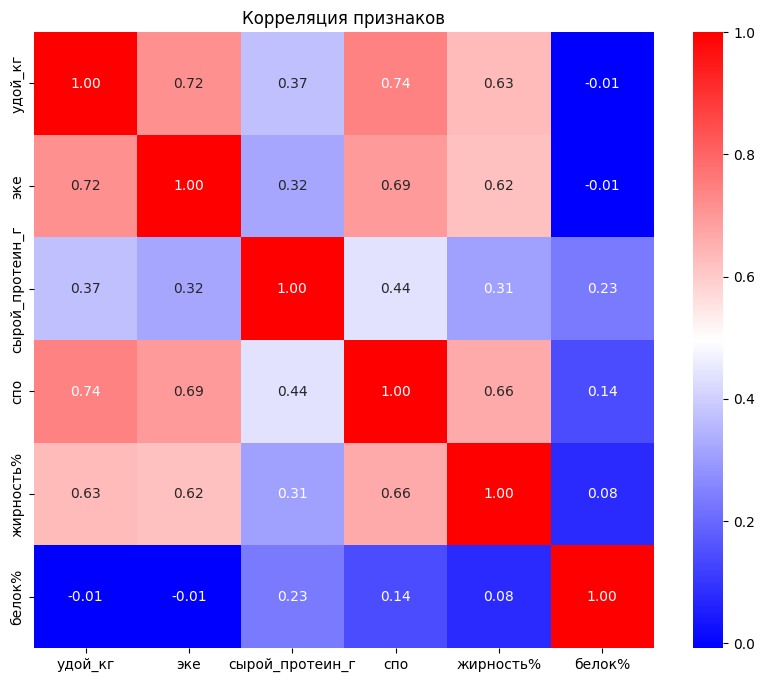

In [42]:
plt.figure(figsize=(10,8))
fig = sns.heatmap(ferma_main[[*num_cols]].corr(method='spearman'), annot=True, fmt='.2f', cmap='bwr') 
fig.set_title('Корреляция признаков')
plt.show()

Вывод. Корреляция у целевого показателя удой - высокая у спо, эке, средняя - у жирности, слабая у сырого протеина.

Построим таблицу корреляции между признаками включая категориальные

In [43]:
ferma_main.phik_matrix(interval_cols=[*num_cols])

id              удой_кг  \
id                               1.00                 1.00   
удой_кг                          1.00                 1.00   
эке                              1.00                 0.70   
сырой_протеин_г                  1.00                 0.41   
спо                              1.00                 0.67   
порода                           1.00                 0.12   
тип_пастбища                     1.00                 0.26   
порода_папы_быка                 1.00                 0.56   
жирность%                        1.00                 0.70   
белок%                           1.00                 0.20   
вкус_молока                      1.00                 0.15   
возраст                          1.00                 1.00   

                                  эке      сырой_протеин_г  \
id                               1.00                 1.00   
удой_кг                          0.70                 0.41   
эке                              1.00                 0.39   
сырой_протеин_г                  0.39                 1.00   
спо                              0.60                 0.35   
порода                           0.12                 0.00   
тип_пастбища                     0.18                 0.10   
порода_папы_быка                 0.15                 0.00   
жирность%                        0.70                 0.33   
белок%                           0.00                 0.25   
вкус_молока                      0.29                 0.15   
возраст                          0.74                 0.24   

                                  спо               порода  \
id                               1.00                 1.00   
удой_кг                          0.67                 0.12   
эке                              0.60                 0.12   
сырой_протеин_г                  0.35                 0.00   
спо                              1.00                 0.16   
порода                           0.16                 1.00   
тип_пастбища                     0.17                 0.18   
порода_папы_быка                 0.49                 0.04   
жирность%                        0.63                 0.34   
белок%                           0.11                 0.39   
вкус_молока                      0.58                 0.00   
возраст                          0.72                 0.09   

                         тип_пастбища     порода_папы_быка  \
id                               1.00                 1.00   
удой_кг                          0.26                 0.56   
эке                              0.18                 0.15   
сырой_протеин_г                  0.10                 0.00   
спо                              0.17                 0.49   
порода                           0.18                 0.04   
тип_пастбища                     1.00                 0.00   
порода_папы_быка                 0.00                 1.00   
жирность%                        0.19                 0.17   
белок%                           0.15                 0.09   
вкус_молока                      0.20                 0.00   
возраст                          0.07                 0.34   

                            жирность%               белок%  \
id                               1.00                 1.00   
удой_кг                          0.70                 0.20   
эке                              0.70                 0.00   
сырой_протеин_г                  0.33                 0.25   
спо                              0.63                 0.11   
порода                           0.34                 0.39   
тип_пастбища                     0.19                 0.15   
порода_папы_быка                 0.17                 0.09   
жирность%                        1.00                 0.24   
белок%                           0.24                 1.00   
вкус_молока                      0.18                 0.13   
возраст                          0.51                 0.00   



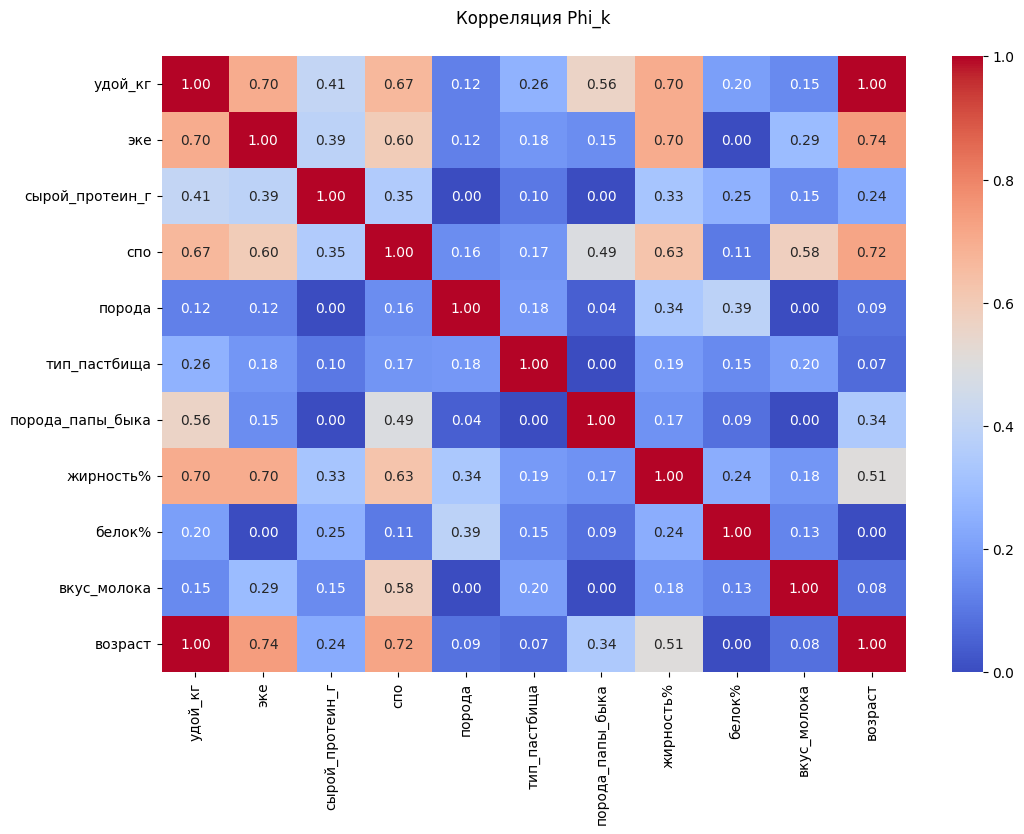

In [44]:
plt.figure(figsize=(12,8))
fig = sns.heatmap(ferma_main.loc[:, ferma_main.columns !='id'].phik_matrix(interval_cols=[*num_cols]), cmap='coolwarm', annot=True, fmt='.2f') 
fig.set_title('Корреляция Phi_k', y=1.04)
plt.show()

На диаграмме видна корреляция между входными признаками: эке и спо, эке и сырой протеин. Но говорить о мультиколлинеарности нельзя - зависимость меньше 0.9. 

Построим диаграммы рассеяния для признака Удой и всех количественных признаков с учетом значения категориальных признаков

In [45]:
display(num_cols)
display(cat_cols)

['удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'жирность%', 'белок%']

['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']

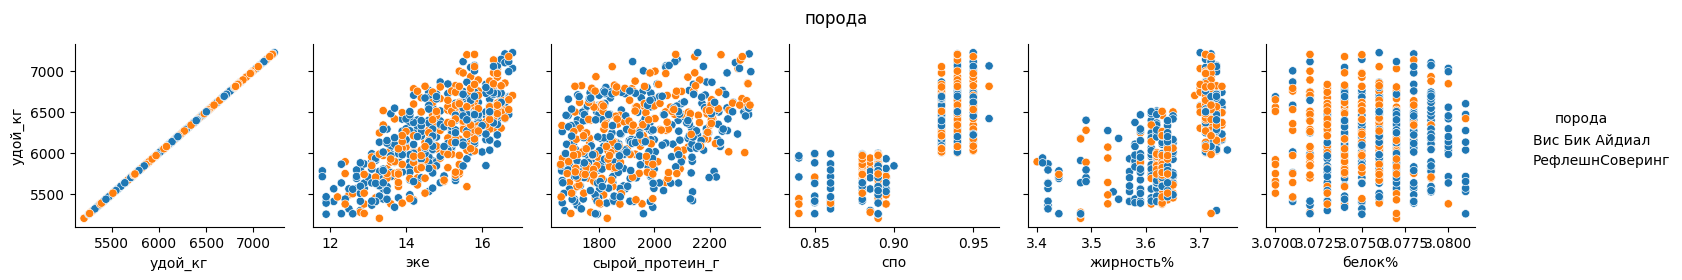

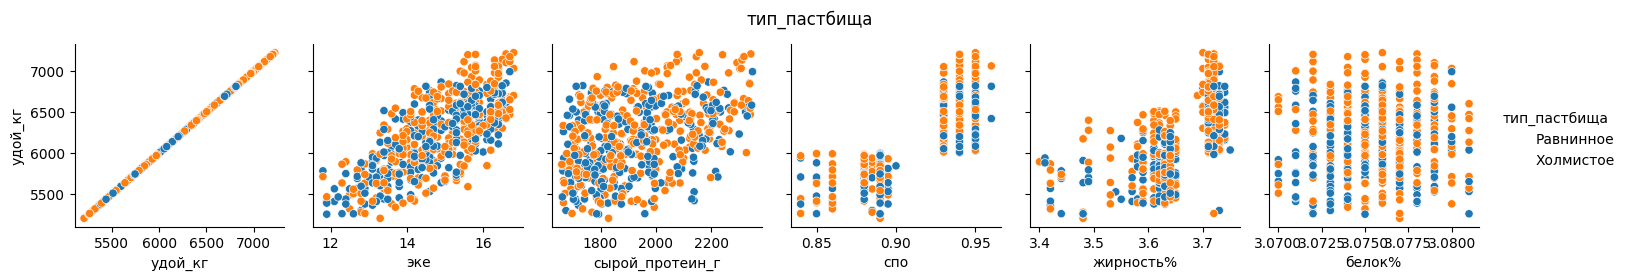

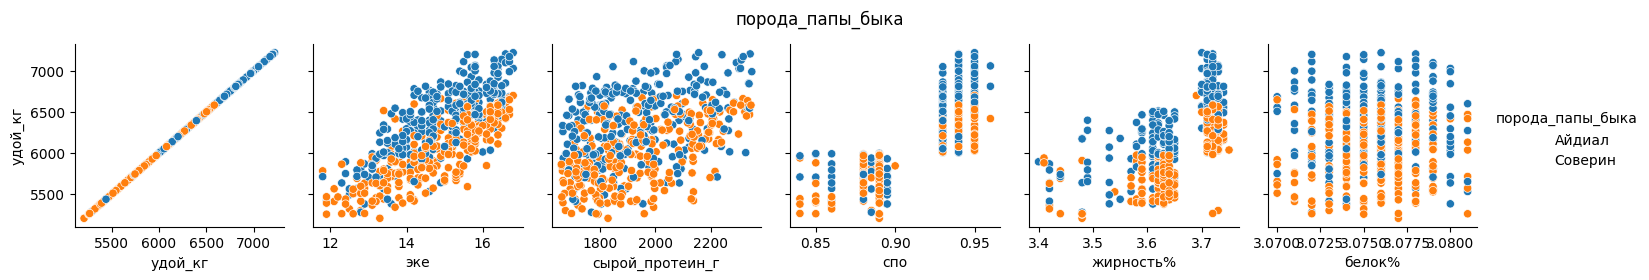

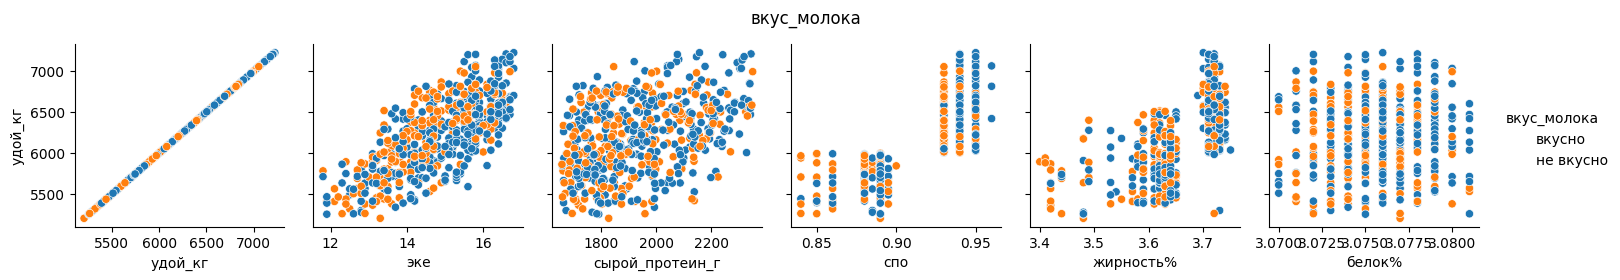

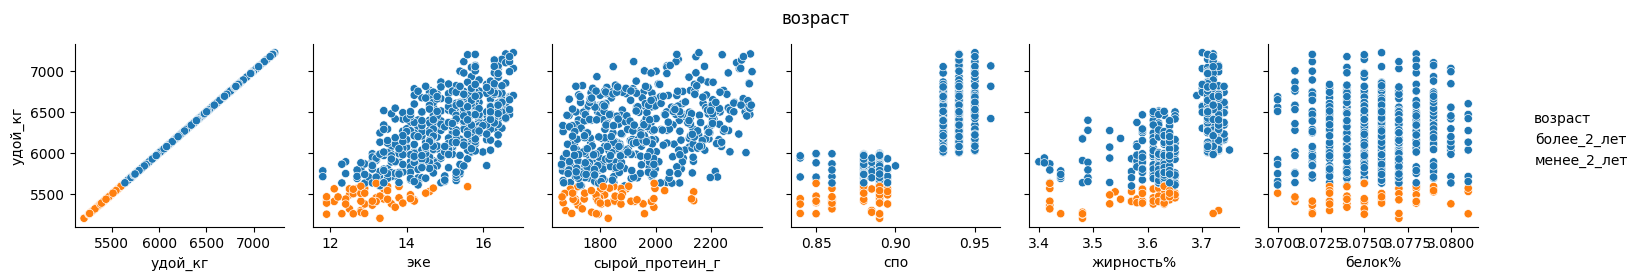

In [46]:
for cat in cat_cols:
    g = sns.PairGrid(ferma_main, hue=cat, x_vars=num_cols, y_vars='удой_кг')
    g.fig.suptitle(cat, y=1.08)
    g.add_legend(legend_data=None, title=cat, label_order=None, adjust_subtitles=False)
    g.map(sns.scatterplot)


**Выводы.**
Видна линейная связь между целевым признаком удой и эке. 
Между удоем и сырым протеином связь не линейная. 
Между удоем и спо есть связь не линейная.
Удой и жирность - связь не линейная.
Между удоем и возрастом - большие удои у коров старше 2 лет.
Удои выше у коров порода папа быка которых Айдиал.

## Обучение модели линейной регрессии

### Первая модель

Готовим данные для обучения одели линейной регрессии. Скопируем в отдельный фрейм. Целевой признак - Удой

In [47]:
ferma1 = ferma_main.copy()

In [48]:
display(ferma1.shape)
ferma1.columns

(538, 12)

Index(['id', 'удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность%', 'белок%',
       'вкус_молока', 'возраст'],
      dtype='object')

Уберем из таблицы данные по жирности, белку (они производные из входящих и коррелируют с целевым признаком Удой). Определяем входящие и целевой признаки. так как жирность и белое это производные от состава корма то их убираем, они не влияют напрямую на удой. Целевой признак - удой.

In [49]:
X = ferma1.drop(columns=['удой_кг', 'жирность%', 'белок%'])
X.head()
y  = ferma1['удой_кг']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [50]:
print('Список категориальных прознаков тренировочной выборки:')
cat_col_names = X_train.select_dtypes(exclude='number').columns.to_list()
cat_col_names
print(X_train[cat_col_names].nunique())

Список категориальных прознаков тренировочной выборки:
порода              2
тип_пастбища        2
порода_папы_быка    2
вкус_молока         2
возраст             2
dtype: int64


In [51]:
# Список количественных признаков тренировочной выборки (без id)
num_col_names =  X_train.select_dtypes(include='number').columns.to_list()[1:]
num_col_names

['эке', 'сырой_протеин_г', 'спо']

Смотрим графики распределения без масштабирования

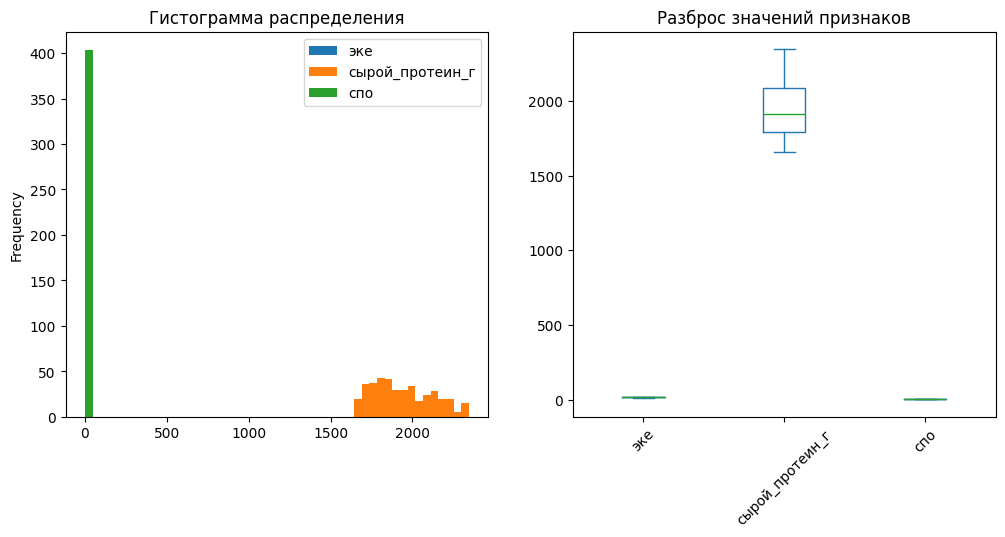

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
X_train[num_col_names].plot(kind='hist', bins=50, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Данным требуется масштабирование.
Масштабирование количественных признаков

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
print(X_train_scaled[:5]) 

[[ 1.27830178  2.20684781  0.73087582]
 [ 0.77489238  0.34308312  0.73087582]
 [ 0.35538455 -0.70528452  0.39992868]
 [-0.73533581  0.29316085 -0.92385988]
 [ 0.35538455 -0.66645609  0.39992868]]


In [54]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

Кодирование категориальных признаков

In [55]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out(input_features=cat_col_names)

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

Объединение отмасштабированных и кодированных данных

In [56]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [57]:
X_train[:5]

порода_РефлешнСоверинг  тип_пастбища_Холмистое  порода_папы_быка_Соверин  \
0                    1.00                    1.00                      0.00   
1                    0.00                    1.00                      1.00   
2                    1.00                    0.00                      0.00   
3                    1.00                    0.00                      1.00   
4                    0.00                    0.00                      0.00   

   вкус_молока_не вкусно  возраст_менее_2_лет                  эке  \
0                   0.00                 0.00                 1.28   
1                   0.00                 0.00                 0.77   
2                   0.00                 0.00                 0.36   
3                   1.00                 0.00                -0.74   
4                   1.00                 0.00                 0.36   

       сырой_протеин_г                  спо  
0                 2.21                 0.73  
1                 0.34                 0.73  
2                -0.71                 0.40  
3                 0.29                -0.92  
4                -0.67                 0.40

Визуальная проверка

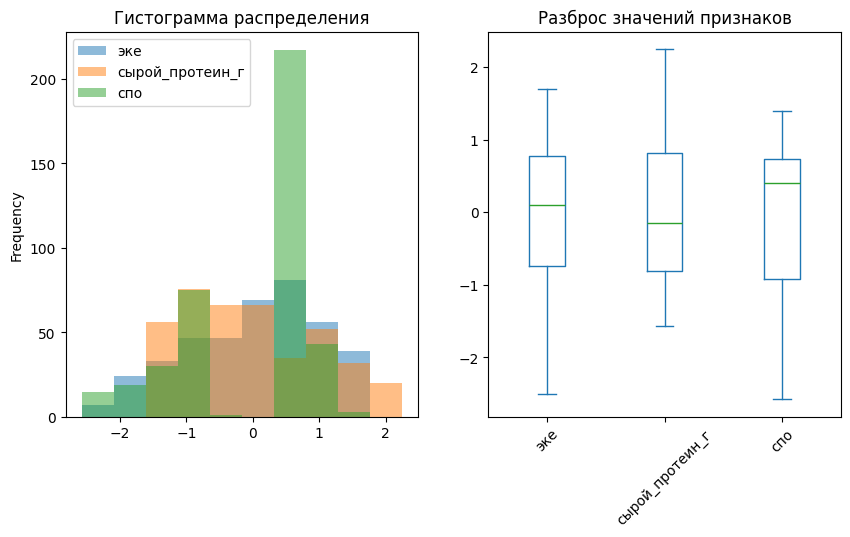

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, alpha=0.5, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Подготовим функцию для подготовки данных (деления на признаки и таргет, скалирования и кодирования категориальных прихнаков), обучения моделей, расчета основных метрик, построения графиков, график распределения остатков, анализа их дисперсии, влияния коэффициентов на таргет.

In [59]:
def model_lin_reg(df, target, cols):
    '''
    Функция принимает датафрейм, таргетинговый столбец, столбцы параметров.
    Выдает модель, скалер и энкодер.
    '''
    # деление данных
    X = df[cols]
    y  = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
    # деление на числовые и не числовые стаолбцы
    num_col_names =  X_train.select_dtypes(include='number').columns.to_list()
    cat_col_names = X_train.select_dtypes(exclude='number').columns.to_list()
    print('Числовые колонки: ', num_col_names)
    print('Категориальные колонки: ', cat_col_names)
    # масштабирование данных
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    # кодирование категориальных признаков
#     print(cat_col_names)
    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
#     print(X_train_ohe)
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    encoder_col_names = encoder.get_feature_names_out(input_features=cat_col_names)
    print('Закодированные признаки:', encoder_col_names)
    
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    # Визуальная проверка подготовленного датасета
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    X_train[num_col_names].plot(kind='hist', bins=10, alpha=0.5, ax=axes[0])
    axes[0].set_title('Гистограмма распределения')
    X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
    axes[1].set_title('Разброс значений признаков')
    plt.show()
    print('Общий список признаков', X_train.columns.tolist())
    # обучение модели
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    # Подсчет показателей
    сonf_int_l, сonf_int_r = st.t.interval(0.95, df=len(predictions)-1, loc=np.mean(predictions), scale=st.sem(predictions))
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    residuals = y_test - predictions

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals, bins=10)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(x=predictions, y=residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()
    
    coefs = pd.DataFrame(model.coef_, columns=["Coefficients"], index=X_train.columns)
    coefs.plot(kind="barh", figsize=(9, 7))
    plt.title("Влияние коэффициентов")
    plt.axvline(x=0, color=".5")
    plt.subplots_adjust(left=0.3)
    plt.show()
    
    print(f'Доверительный интервал = {сonf_int_l:.2f}, {сonf_int_r:.2f}')
    print(f'MSE = {mse:.2f}')
    print(f'RMSE = {rmse:.2f}')
    print(f'MAE = {mae:.0f}')
    print(f'r2 = {r2:.4f}')
    return model, scaler, encoder

Воспользуемся функцией

Числовые колонки:  ['эке', 'сырой_протеин_г', 'спо']
Категориальные колонки:  ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']
Закодированные признаки: ['порода_РефлешнСоверинг' 'тип_пастбища_Холмистое'
 'порода_папы_быка_Соверин' 'вкус_молока_не вкусно' 'возраст_менее_2_лет']


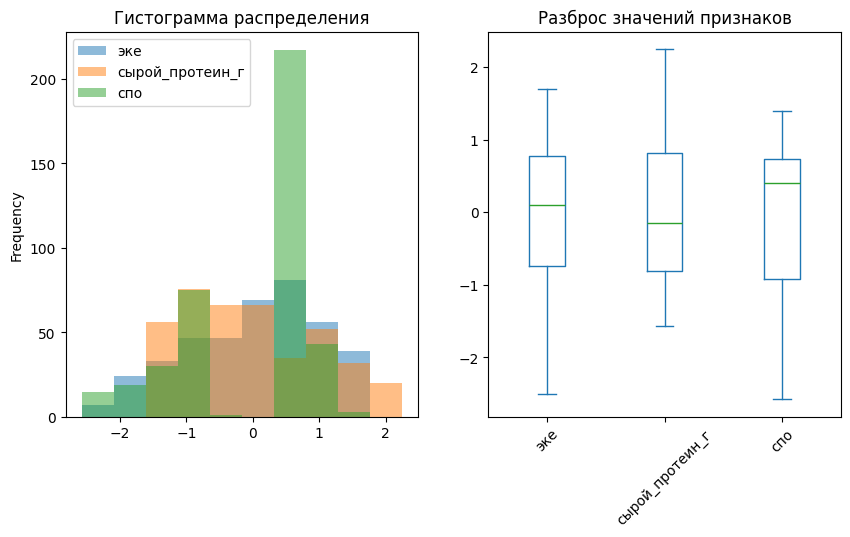

Общий список признаков ['порода_РефлешнСоверинг', 'тип_пастбища_Холмистое', 'порода_папы_быка_Соверин', 'вкус_молока_не вкусно', 'возраст_менее_2_лет', 'эке', 'сырой_протеин_г', 'спо']


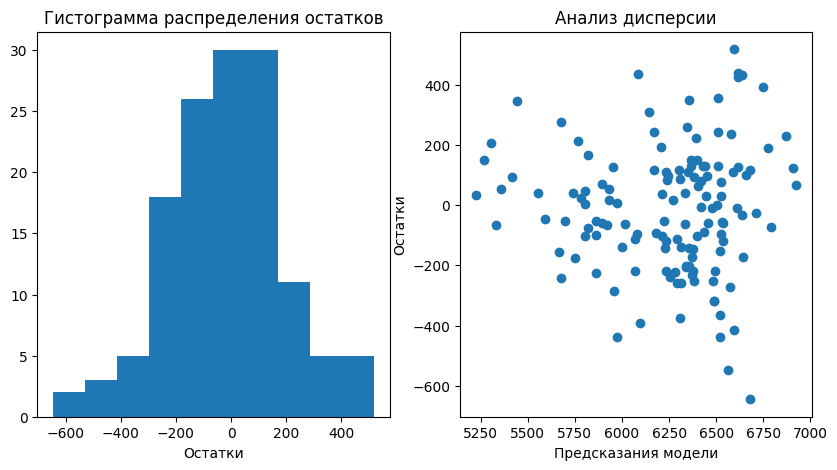

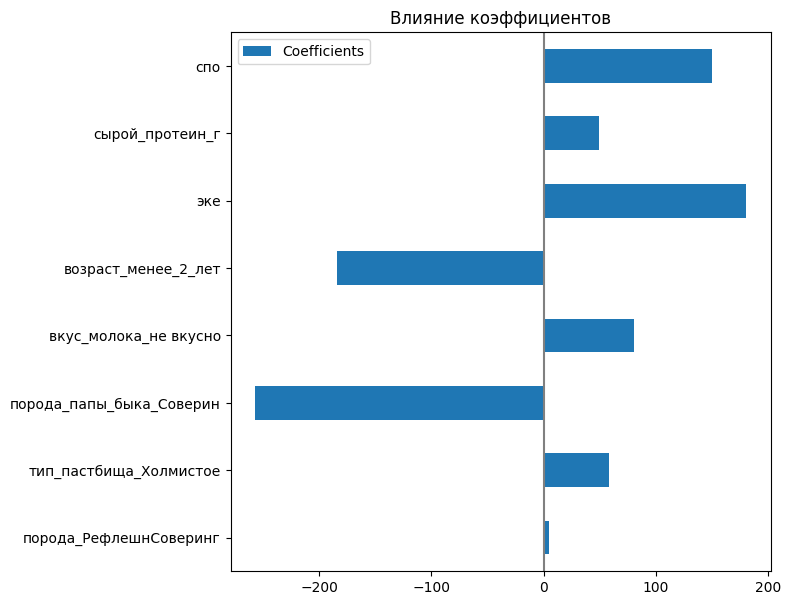

Доверительный интервал = 6179.10, 6303.95
MSE = 43922.20
RMSE = 209.58
MAE = 166
r2 = 0.7500


In [60]:
columns = ['эке', 'сырой_протеин_г', 'спо', 'порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']
_ = model_lin_reg(ferma_main, 'удой_кг', cols=columns)

Подсчет остатков и визуализация их распределения

Выводы. Распределение остатков похоже на нормальное. На бОльших показателях надоев дисперсия визуально выше. Это говорит о недостаточной гомоскедастичности (однорожности дисперсии).

Значение r2 = 0.75 говорит о том что точность модели 75%. Что мало. Нужны дополнительные исследования для повышения точности. Например, можно ввести дополнительные входные признаки.


Добавим в модель дополнительные признаки.

### Вторая модель

Добавим в таблицу новый признак - Имя Папы

In [61]:
ferma_2 = ferma_main.copy()
ferma_2.head()

id  удой_кг                  эке  сырой_протеин_г                  спо  \
0   1     5863                14.20             1743                 0.89   
1   2     5529                12.80             2138                 0.89   
2   3     5810                14.00             1854                 0.89   
3   4     5895                12.40             2012                 0.89   
4   5     5302                12.80             1675                 0.89   

            порода тип_пастбища порода_папы_быка            жирность%  \
0   Вис Бик Айдиал    Равнинное           Айдиал                 3.58   
1   Вис Бик Айдиал    Равнинное          Соверин                 3.54   
2  РефлешнСоверинг    Холмистое          Соверин                 3.59   
3  РефлешнСоверинг    Холмистое           Айдиал                 3.40   
4   Вис Бик Айдиал    Равнинное          Соверин                 3.73   

                белок% вкус_молока      возраст  
0                 3.08      вкусно  более_2_лет  
1                 3.08      вкусно  менее_2_лет  
2                 3.07   не вкусно  более_2_лет  
3                 3.08   не вкусно  более_2_лет  
4                 3.07      вкусно  менее_2_лет

In [62]:
ferma_dad.head()

id  имя_папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

Соединыем и проверяем

In [63]:
ferma2 = ferma_2.merge(ferma_dad, on='id', how='left')
ferma2.isna().sum()

id                  0
удой_кг             0
эке                 0
сырой_протеин_г     0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность%           0
белок%              0
вкус_молока         0
возраст             0
имя_папы            0
dtype: int64

Повторяем шаги как при подготовке второй модели

In [64]:
ferma2.head()

id  удой_кг                  эке  сырой_протеин_г                  спо  \
0   1     5863                14.20             1743                 0.89   
1   2     5529                12.80             2138                 0.89   
2   3     5810                14.00             1854                 0.89   
3   4     5895                12.40             2012                 0.89   
4   5     5302                12.80             1675                 0.89   

            порода тип_пастбища порода_папы_быка            жирность%  \
0   Вис Бик Айдиал    Равнинное           Айдиал                 3.58   
1   Вис Бик Айдиал    Равнинное          Соверин                 3.54   
2  РефлешнСоверинг    Холмистое          Соверин                 3.59   
3  РефлешнСоверинг    Холмистое           Айдиал                 3.40   
4   Вис Бик Айдиал    Равнинное          Соверин                 3.73   

                белок% вкус_молока      возраст  имя_папы  
0                 3.08      вкусно  более_2_лет    Буйный  
1                 3.08      вкусно  менее_2_лет  Соловчик  
2                 3.07   не вкусно  более_2_лет     Барин  
3                 3.08   не вкусно  более_2_лет    Буйный  
4                 3.07      вкусно  менее_2_лет     Барин

Подготавливаем данные, проверяем по матрице корреляции и строим Phi корреляцию.

In [65]:
ferma2['spo'] = np.where(ferma2['спо'] > 0.92, 1, 0)
ferma2['spo'] = ferma2['spo'].astype('str')

Возводим в квадрат показетль эке только для коров старше 2 лет

In [66]:
ferma2['эке_2'] = np.where(ferma2['возраст'] == 'более_2_лет', ferma2['эке']**2 , ferma2['эке'])

In [67]:
num_cols = ferma2.select_dtypes(include='number').columns.drop('id').tolist()
num_cols 

['удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'жирность%', 'белок%', 'эке_2']

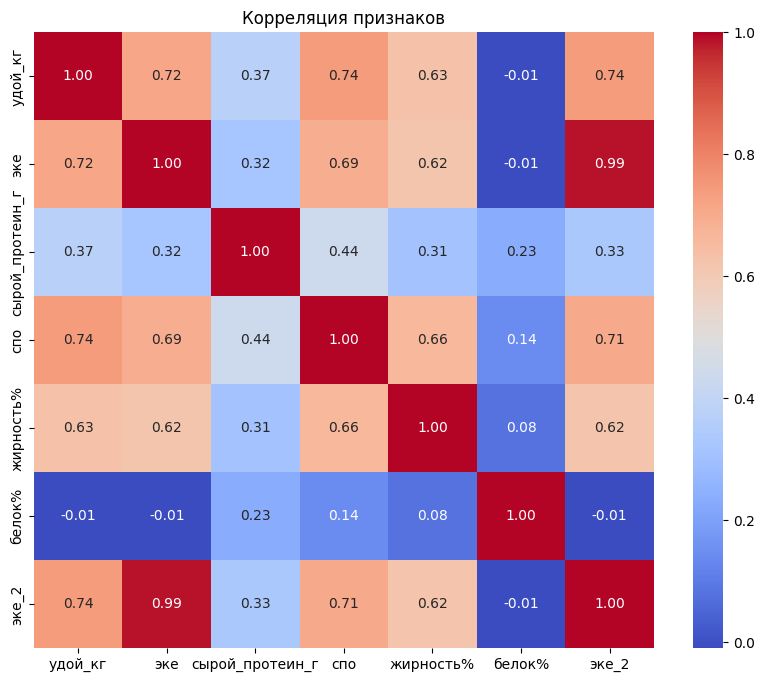

In [68]:
plt.figure(figsize=(10,8))
fig = sns.heatmap(ferma2[[*num_cols]].corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm') 
fig.set_title('Корреляция признаков')
plt.show()

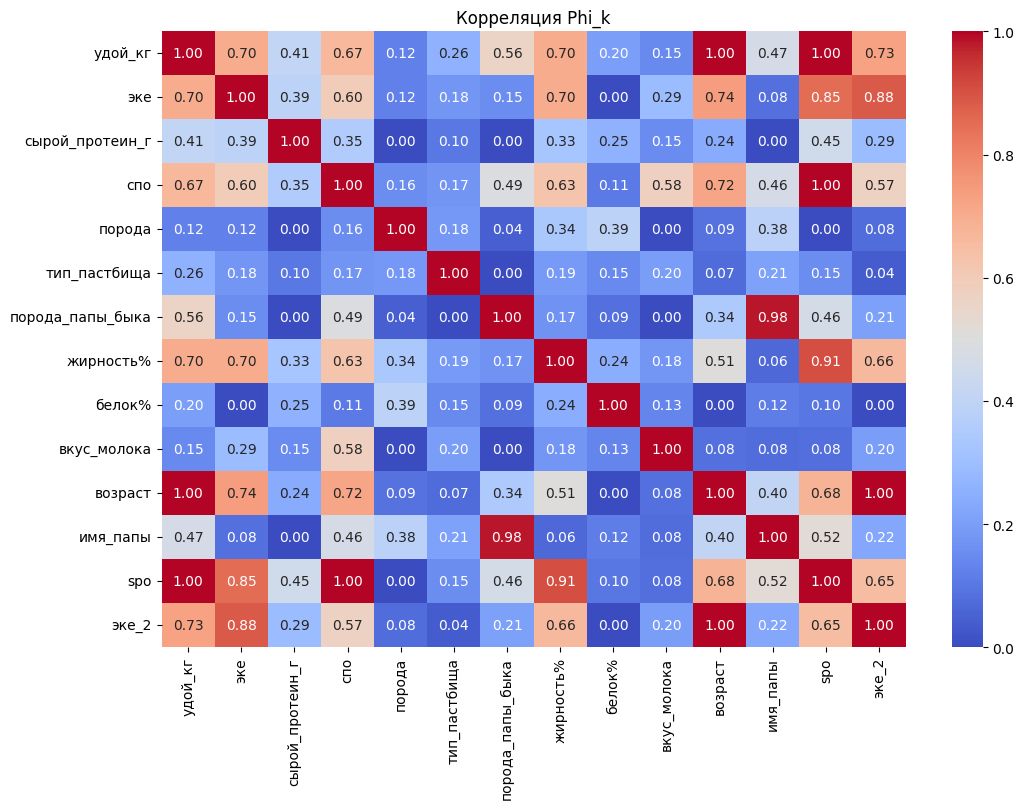

In [69]:
plt.figure(figsize=(12,8))
fig = sns.heatmap(ferma2.loc[:, ferma2.columns !='id'].phik_matrix(interval_cols=[*num_cols]), cmap='coolwarm', annot=True, fmt='.2f') 
fig.set_title('Корреляция Phi_k')
plt.show()

Убираем из входящих признаки с высокой линеарностью: эке, спо. Тем более у нас есть преобразовынные признаки из них.

In [70]:
ferma2.head()

id  удой_кг                  эке  сырой_протеин_г                  спо  \
0   1     5863                14.20             1743                 0.89   
1   2     5529                12.80             2138                 0.89   
2   3     5810                14.00             1854                 0.89   
3   4     5895                12.40             2012                 0.89   
4   5     5302                12.80             1675                 0.89   

            порода тип_пастбища порода_папы_быка            жирность%  \
0   Вис Бик Айдиал    Равнинное           Айдиал                 3.58   
1   Вис Бик Айдиал    Равнинное          Соверин                 3.54   
2  РефлешнСоверинг    Холмистое          Соверин                 3.59   
3  РефлешнСоверинг    Холмистое           Айдиал                 3.40   
4   Вис Бик Айдиал    Равнинное          Соверин                 3.73   

                белок% вкус_молока      возраст  имя_папы spo  \
0                 3.08      вкусно  более_2_лет    Буйный   0   
1                 3.08      вкусно  менее_2_лет  Соловчик   0   
2                 3.07   не вкусно  более_2_лет     Барин   0   
3                 3.08   не вкусно  более_2_лет    Буйный   0   
4                 3.07      вкусно  менее_2_лет     Барин   0   

                 эке_2  
0               201.64  
1                12.80  
2               196.00  
3               153.76  
4                12.80

Строим модель 2

Index(['id', 'удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность%', 'белок%',
       'вкус_молока', 'возраст', 'имя_папы', 'spo', 'эке_2'],
      dtype='object')

Числовые колонки:  ['сырой_протеин_г', 'жирность%', 'белок%', 'эке_2']
Категориальные колонки:  ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы', 'spo']
Закодированные признаки: ['порода_РефлешнСоверинг' 'тип_пастбища_Холмистое'
 'порода_папы_быка_Соверин' 'возраст_менее_2_лет' 'имя_папы_Буйный'
 'имя_папы_Геркулес' 'имя_папы_Соловчик' 'spo_1']


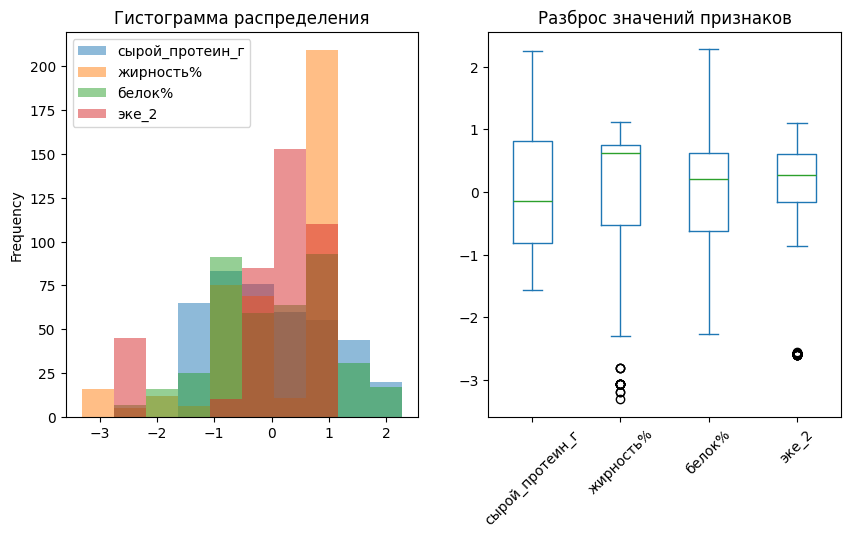

Общий список признаков ['порода_РефлешнСоверинг', 'тип_пастбища_Холмистое', 'порода_папы_быка_Соверин', 'возраст_менее_2_лет', 'имя_папы_Буйный', 'имя_папы_Геркулес', 'имя_папы_Соловчик', 'spo_1', 'сырой_протеин_г', 'жирность%', 'белок%', 'эке_2']


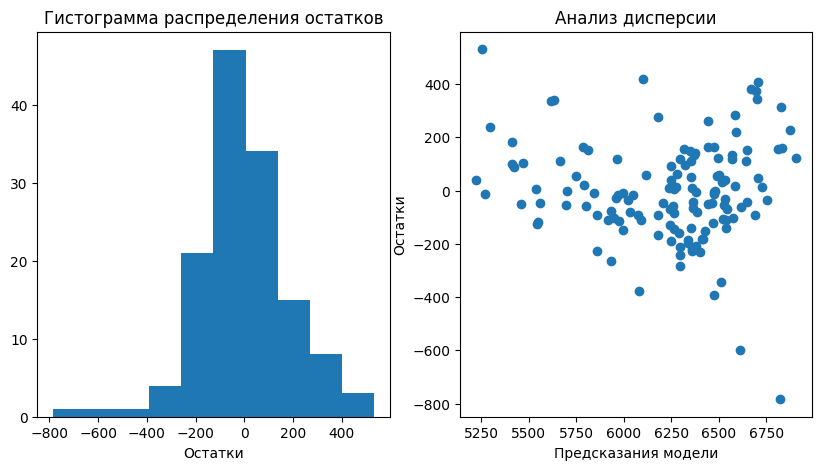

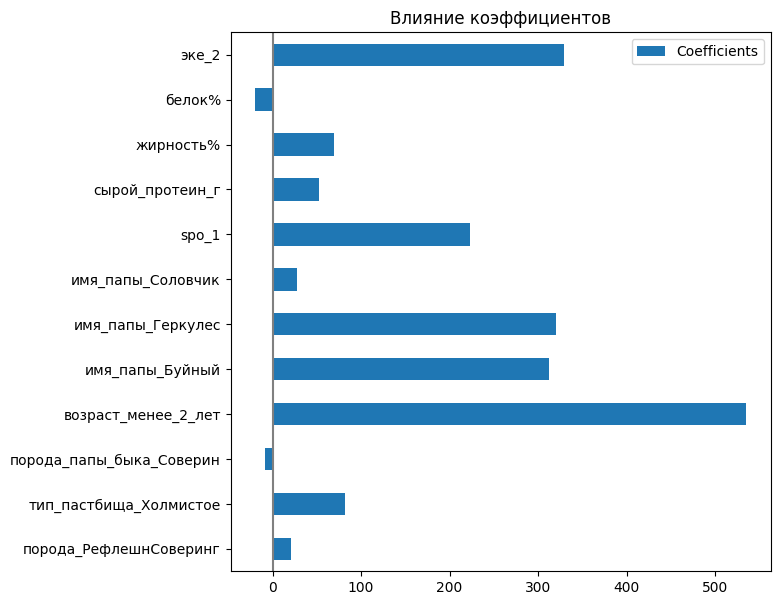

Доверительный интервал = 6166.12, 6299.08
MSE = 35237.04
RMSE = 187.72
MAE = 139
r2 = 0.7995


In [71]:
display(ferma2.columns)
columns = ['сырой_протеин_г', 'порода', 'тип_пастбища', 'порода_папы_быка', 'жирность%', 'белок%', 'возраст', 'эке_2', 'имя_папы', 'spo']
# columns = ['сырой_протеин_г', 'порода', 'тип_пастбища', 'жирность%', 'белок%', 'возраст', 'эке_2', 'имя_папы', 'spo']
model_2, scaler_2, encoder_2 = model_lin_reg(ferma2, 'удой_кг', cols=columns)

Вырос коэффициент детерминации r2 = 80%, MAE = 139. Будем применять ее для прогнозирования


### Делаем прогноз 

Выбираем вторую модель как лучшую. Будем использовать ее для прогноза удоев. 
Сначала готовим данные.

In [72]:
buy = cow_buy.copy()

In [73]:
buy.head()

порода тип_пастбища порода_папы_быка  имя_папы  \
0   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    Равнинное          Соверин    Буйный   
2  РефлешнСоверинг    Равнинное          Соверин     Барин   
3  РефлешнСоверинг    Холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    Равнинное           Айдиал    Буйный   

     текущая_жирность%  текущий_уровень_белок%      возраст  
0                 3.58                    3.08  более_2_лет  
1                 3.54                    3.08  менее_2_лет  
2                 3.59                    3.07  более_2_лет  
3                 3.40                    3.06  более_2_лет  
4                 3.64                    3.07  более_2_лет

In [74]:
mean_eke = (ferma_main['эке'].mean() * 1.05).round(2)
mean_protein = (ferma_main['сырой_протеин_г'].mean() * 1.05).round(2)
mean_spo = (ferma_main['спо'].mean() * 1.05).round(2)
mean_eke

15.52

In [75]:
buy['эке'] = mean_eke
buy['сырой_протеин_г'] = mean_protein
buy['спо'] = mean_spo

In [76]:
buy.head()

порода тип_пастбища порода_папы_быка  имя_папы  \
0   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    Равнинное          Соверин    Буйный   
2  РефлешнСоверинг    Равнинное          Соверин     Барин   
3  РефлешнСоверинг    Холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    Равнинное           Айдиал    Буйный   

     текущая_жирность%  текущий_уровень_белок%      возраст  \
0                 3.58                    3.08  более_2_лет   
1                 3.54                    3.08  менее_2_лет   
2                 3.59                    3.07  более_2_лет   
3                 3.40                    3.06  более_2_лет   
4                 3.64                    3.07  более_2_лет   

                   эке      сырой_протеин_г                  спо  
0                15.52              2040.48                 0.96  
1                15.52              2040.48                 0.96  
2                15.52              2040.48                 0.96  
3                15.52              2040.48                 0.96  
4                15.52              2040.48                 0.96

In [77]:
# buy['тип_пастбища'] = buy['тип_пастбища'].replace('равнинное', 'Равнинное')
# buy['тип_пастбища'] = buy['тип_пастбища'].replace('холмистое', 'Холмистое')

Меняем признак СПО как категориальный, эке_2 - в квадрат возмодим только у буренок старше 2 лет

In [78]:
buy['spo'] = np.where(buy['спо'] > 0.92, 1, 0)
buy['spo'] = buy['spo'].astype('str')

In [79]:
buy['эке_2'] = np.where(buy['возраст'] == 'более_2_лет', buy['эке']**2 , buy['эке'])

In [80]:
buy.rename(columns = {'текущая_жирность%':'жирность%', 'текущий_уровень_белок%':'белок%'}, inplace = True )

In [81]:
buy.head()

порода тип_пастбища порода_папы_быка  имя_папы  \
0   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    Равнинное          Соверин    Буйный   
2  РефлешнСоверинг    Равнинное          Соверин     Барин   
3  РефлешнСоверинг    Холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    Равнинное           Айдиал    Буйный   

             жирность%               белок%      возраст                  эке  \
0                 3.58                 3.08  более_2_лет                15.52   
1                 3.54                 3.08  менее_2_лет                15.52   
2                 3.59                 3.07  более_2_лет                15.52   
3                 3.40                 3.06  более_2_лет                15.52   
4                 3.64                 3.07  более_2_лет                15.52   

       сырой_протеин_г                  спо spo                эке_2  
0              2040.48                 0.96   1               240.87  
1              2040.48                 0.96   1                15.52  
2              2040.48                 0.96   1               240.87  
3              2040.48                 0.96   1               240.87  
4              2040.48                 0.96   1               240.87

In [82]:
X = buy
X.head()

порода тип_пастбища порода_папы_быка  имя_папы  \
0   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    Равнинное          Соверин    Буйный   
2  РефлешнСоверинг    Равнинное          Соверин     Барин   
3  РефлешнСоверинг    Холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    Равнинное           Айдиал    Буйный   

             жирность%               белок%      возраст                  эке  \
0                 3.58                 3.08  более_2_лет                15.52   
1                 3.54                 3.08  менее_2_лет                15.52   
2                 3.59                 3.07  более_2_лет                15.52   
3                 3.40                 3.06  более_2_лет                15.52   
4                 3.64                 3.07  более_2_лет                15.52   

       сырой_протеин_г                  спо spo                эке_2  
0              2040.48                 0.96   1               240.87  
1              2040.48                 0.96   1                15.52  
2              2040.48                 0.96   1               240.87  
3              2040.48                 0.96   1               240.87  
4              2040.48                 0.96   1               240.87

Список признаков ['порода_РефлешнСоверинг', 'тип_пастбища_Холмистое', 'порода_папы_быка_Соверин', 'возраст_менее_2_лет', 'имя_папы_Буйный', 'имя_папы_Геркулес', 'имя_папы_Соловчик', 'spo_1', 'сырой_протеин_г', 'жирность%', 'белок%', 'эке_2']

Числовые колонки:  ['сырой_протеин_г', 'жирность%', 'белок%', 'эке_2']

Категориальные колонки:  ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы', 'spo']

In [83]:
columns = ['сырой_протеин_г', 'порода', 'тип_пастбища', 'порода_папы_быка', 'жирность%', 'белок%', 'возраст', 'эке_2', 'имя_папы', 'spo']

In [84]:
X.columns

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'жирность%',
       'белок%', 'возраст', 'эке', 'сырой_протеин_г', 'спо', 'spo', 'эке_2'],
      dtype='object')

In [85]:
model_2, scaler_2, encoder_2

(LinearRegression(),
 StandardScaler(),
 OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))

Скалируем

In [86]:
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)

In [87]:
num_col_names = ['сырой_протеин_г', 'жирность%', 'белок%', 'эке_2']
X_scaled = scaler_2.transform(X[num_col_names])
display(X_scaled[:5]) 
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)
display(X_scaled[:5]) 

array([[ 0.55098163, -1.03130626,  0.20897121,  0.52806939],
       [ 0.55098163, -1.53800107,  2.27307406, -2.55120645],
       [ 0.55098163, -0.90463255, -0.61666993,  0.52806939],
       [ 0.55098163, -3.31143292, -5.98333736,  0.52806939],
       [ 0.55098163, -0.27126404, -0.61666993,  0.52806939]])

сырой_протеин_г            жирность%               белок%  \
0                 0.55                -1.03                 0.21   
1                 0.55                -1.54                 2.27   
2                 0.55                -0.90                -0.62   
3                 0.55                -3.31                -5.98   
4                 0.55                -0.27                -0.62   

                 эке_2  
0                 0.53  
1                -2.55  
2                 0.53  
3                 0.53  
4                 0.53

Кодируем

In [88]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы', 'spo']
X_ohe = encoder_2.transform(X[cat_col_names])
encoder_col_names = encoder_2.get_feature_names_out(input_features=cat_col_names)
#     print('Закодированные признаки:', encoder_col_names)
X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
display(X_ohe[:5]) 

порода_РефлешнСоверинг  тип_пастбища_Холмистое  порода_папы_быка_Соверин  \
0                    0.00                    1.00                      0.00   
1                    0.00                    0.00                      1.00   
2                    1.00                    0.00                      1.00   
3                    1.00                    1.00                      0.00   
4                    1.00                    0.00                      0.00   

   возраст_менее_2_лет      имя_папы_Буйный    имя_папы_Геркулес  \
0                 0.00                 0.00                 1.00   
1                 1.00                 1.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                 1.00                 0.00   
4                 0.00                 1.00                 0.00   

     имя_папы_Соловчик                spo_1  
0                 0.00                 1.00  
1                 0.00                 1.00  
2                 0.00                 1.00  
3                 0.00                 1.00  
4                 0.00                 1.00

Объединяем, делаем регрессию и записываем в таблицу

In [89]:
X = pd.concat([X_ohe, X_scaled], axis=1)

In [90]:
predictions = model_2.predict(X)
buy_pred = buy.copy()
buy_pred.insert(loc = len(buy_pred.columns), column='Прогноз_удоя', value=predictions)
print('Количество буренок:', buy_pred[buy_pred['Прогноз_удоя']>6000]['Прогноз_удоя'].count())
display(buy_pred)

Количество буренок: 17


порода тип_пастбища порода_папы_быка  имя_папы  \
0    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
1    Вис Бик Айдиал    Равнинное          Соверин    Буйный   
2   РефлешнСоверинг    Равнинное          Соверин     Барин   
3   РефлешнСоверинг    Холмистое           Айдиал    Буйный   
4   РефлешнСоверинг    Равнинное           Айдиал    Буйный   
5   РефлешнСоверинг    Равнинное          Соверин  Геркулес   
6    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
7    Вис Бик Айдиал    Равнинное          Соверин    Буйный   
8   РефлешнСоверинг    Равнинное          Соверин     Барин   
9   РефлешнСоверинг    Холмистое           Айдиал    Буйный   
10   Вис Бик Айдиал    Холмистое          Соверин  Соловчик   
11  РефлешнСоверинг    Равнинное          Соверин  Геркулес   
12   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
13   Вис Бик Айдиал    Холмистое          Соверин     Барин   
14  РефлешнСоверинг    Равнинное          Соверин     Барин   
15  РефлешнСоверинг    Холмистое           Айдиал    Буйный   
16   Вис Бик Айдиал    Холмистое          Соверин  Соловчик   
17  РефлешнСоверинг    Равнинное          Соверин  Геркулес   
18   Вис Бик Айдиал    Равнинное          Соверин    Буйный   
19  РефлешнСоверинг    Равнинное           Айдиал    Буйный   

              жирность%               белок%      возраст  \
0                  3.58                 3.08  более_2_лет   
1                  3.54                 3.08  менее_2_лет   
2                  3.59                 3.07  более_2_лет   
3                  3.40                 3.06  более_2_лет   
4                  3.64                 3.07  более_2_лет   
5                  3.63                 3.05  менее_2_лет   
6                  3.58                 3.08  более_2_лет   
7                  3.57                 3.08  более_2_лет   
8                  3.59                 3.07  более_2_лет   
9                  3.40                 3.08  менее_2_лет   
10                 3.73                 3.06  более_2_лет   
11                 3.73                 3.07  более_2_лет   
12                 3.68                 3.05  более_2_лет   
13                 3.42                 3.08  менее_2_лет   
14                 3.59                 3.07  более_2_лет   
15                 3.40                 3.06  более_2_лет   
16                 3.73                 3.08  более_2_лет   
17                 3.77                 3.05  менее_2_лет   
18                 3.34                 3.07  более_2_лет   
19                 3.64                 3.07  более_2_лет   

                    эке      сырой_протеин_г                  спо spo  \
0                 15.52              2040.48                 0.96   1   
1                 15.52              2040.48                 0.96   1   
2                 15.52              2040.48                 0.96   1   
3                 15.52              2040.48                 0.96   1   
4                 15.52              2040.48                 0.96   1   
5                 15.52              2040.48                 0.96   1   
6                 15.52              2040.48                 0.96   1   
7                 15.52              2040.48                 0.96   1   
8                 15.52              2040.48                 0.96   1   
9                 15.52              2040.48                 0.96   1   
10                15.52              2040.48                 0.96   1   
11                15.52              2040.48                 0.96   1   
12                15.52              2040.48                 0.96   1   
13                15.52              2040.48                 0.96   1   
14                15.52              2040.48                 0.96   1   
15                15.52              2040.48                 0.96   1   
16                15.52              2040.48                 0.96   1   
17                15.52              2040.48                 0.96   1   
18                15

Вывод: Прогноз удоя более чем оптимистичный - удой выше целевых 6000 л в год у 17 буренок.

## Обучение модели логистической регрессии

Переходим к задаче классификации. Целевой признак - вкус молока.

In [91]:
ferma_main.head()

id  удой_кг                  эке  сырой_протеин_г                  спо  \
0   1     5863                14.20             1743                 0.89   
1   2     5529                12.80             2138                 0.89   
2   3     5810                14.00             1854                 0.89   
3   4     5895                12.40             2012                 0.89   
4   5     5302                12.80             1675                 0.89   

            порода тип_пастбища порода_папы_быка            жирность%  \
0   Вис Бик Айдиал    Равнинное           Айдиал                 3.58   
1   Вис Бик Айдиал    Равнинное          Соверин                 3.54   
2  РефлешнСоверинг    Холмистое          Соверин                 3.59   
3  РефлешнСоверинг    Холмистое           Айдиал                 3.40   
4   Вис Бик Айдиал    Равнинное          Соверин                 3.73   

                белок% вкус_молока      возраст  
0                 3.08      вкусно  более_2_лет  
1                 3.08      вкусно  менее_2_лет  
2                 3.07   не вкусно  более_2_лет  
3                 3.08   не вкусно  более_2_лет  
4                 3.07      вкусно  менее_2_лет

Дополним модель данными - добавим в датасет Имя папы


In [92]:
ferma_0 = ferma_main.copy()

In [93]:
ferma = ferma_0.merge(ferma_dad, on='id', how='left')
ferma.isna().sum()

id                  0
удой_кг             0
эке                 0
сырой_протеин_г     0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность%           0
белок%              0
вкус_молока         0
возраст             0
имя_папы            0
dtype: int64

Сравниваем с колонками датасета по которому нужно будет делать предсказание чтобы заранее знать что нужно добавить или убрать.

In [94]:
cow_buy.isna().sum()

порода                    0
тип_пастбища              0
порода_папы_быка          0
имя_папы                  0
текущая_жирность%         0
текущий_уровень_белок%    0
возраст                   0
dtype: int64

По аналогии с линейной регрессией добавим средние показатели по кормам. А в датафрейме ferma уберем удой. Вкус молока сделаем целевым. Остальные 10 показателей будут - входящими признаками. 

Делим исходный датафрейм

In [95]:
X = ferma.drop(columns=['удой_кг', 'вкус_молока', 'id'])
X.head()
y  = ferma['вкус_молока']

In [96]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   эке               538 non-null    float64
 1   сырой_протеин_г   538 non-null    int64  
 2   спо               538 non-null    float64
 3   порода            538 non-null    object 
 4   тип_пастбища      538 non-null    object 
 5   порода_папы_быка  538 non-null    object 
 6   жирность%         538 non-null    float64
 7   белок%            538 non-null    float64
 8   возраст           538 non-null    object 
 9   имя_папы          538 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 42.2+ KB


In [97]:
le = LabelEncoder()
ferma['вкус'] = 1 - le.fit_transform(y)
# ferma['вкус'] = le.fit_transform(y)
display(ferma[['вкус_молока', 'вкус']].head())
y = ferma['вкус']

вкус_молока  вкус
0      вкусно     1
1      вкусно     1
2   не вкусно     0
3   не вкусно     0
4      вкусно     1

Делим выборку на тренировочную и тестовую

In [98]:
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state=RANDOM_STATE, stratify=y)

Выделяем числовые и не числовые признаки

In [99]:
num_col_names =  X_train.select_dtypes(include='number').columns.to_list()
num_col_names

['эке', 'сырой_протеин_г', 'спо', 'жирность%', 'белок%']

In [100]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [101]:
X_train_scaled

эке      сырой_протеин_г                  спо  \
0                  -2.54                -0.52                -2.02   
1                   1.24                 0.56                 1.07   
2                   0.47                -1.50                -0.99   
3                   0.47                 0.15                -0.99   
4                  -0.05                 1.32                 0.72   
..                   ...                  ...                  ...   
398                 1.24                -0.19                 0.72   
399                 0.73                 0.78                 0.72   
400                 0.38                -0.67                 0.38   
401                -1.85                -0.86                -0.99   
402                 0.38                 0.54                 0.72   

               жирность%               белок%  
0                  -2.95                 1.75  
1                   0.88                 0.15  
2                  -0.58                 0.15  
3                  -0.44                -0.25  
4                   0.74                -0.65  
..                   ...                  ...  
398                 0.61                 0.95  
399                 0.74                 0.15  
400                 0.88                -0.65  
401                -2.42                 2.15  
402                 0.74                -0.25  

[403 rows x 5 columns]

Кодируем категориальные признаки

In [102]:
cat_col_names = X_train.select_dtypes(exclude='number').columns.to_list()
cat_col_names
print(X_train[cat_col_names].nunique())

порода              2
тип_пастбища        2
порода_папы_быка    2
возраст             2
имя_папы            4
dtype: int64


Кодируем признаки с помощью OneHtEncoder

In [103]:
# encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
# encoder_col_names = encoder.get_feature_names_out()
encoder_col_names = encoder.get_feature_names_out(input_features=cat_col_names)

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

Объединяем датафреймы

In [104]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [105]:
X_train

порода_РефлешнСоверинг  тип_пастбища_Холмистое  порода_папы_быка_Соверин  \
0                      0.00                    1.00                      0.00   
1                      1.00                    0.00                      1.00   
2                      0.00                    1.00                      1.00   
3                      1.00                    0.00                      1.00   
4                      0.00                    0.00                      1.00   
..                      ...                     ...                       ...   
398                    0.00                    1.00                      0.00   
399                    0.00                    0.00                      1.00   
400                    0.00                    0.00                      0.00   
401                    0.00                    0.00                      1.00   
402                    1.00                    1.00                      1.00   

     возраст_менее_2_лет      имя_папы_Буйный    имя_папы_Геркулес  \
0                   0.00                 1.00                 0.00   
1                   0.00                 0.00                 0.00   
2                   0.00                 0.00                 0.00   
3                   0.00                 0.00                 0.00   
4                   0.00                 0.00                 0.00   
..                   ...                  ...                  ...   
398                 0.00                 0.00                 1.00   
399                 0.00                 0.00                 0.00   
400                 0.00                 1.00                 0.00   
401                 1.00                 0.00                 0.00   
402                 0.00                 0.00                 0.00   

       имя_папы_Соловчик                  эке      сырой_протеин_г  \
0                   0.00                -2.54                -0.52   
1                   0.00                 1.24                 0.56   
2                   0.00                 0.47                -1.50   
3                   0.00                 0.47                 0.15   
4                   1.00                -0.05                 1.32   
..                   ...                  ...                  ...   
398                 0.00                 1.24                -0.19   
399                 1.00                 0.73                 0.78   
400                 0.00                 0.38                -0.67   
401                 0.00                -1.85                -0.86   
402                 0.00                 0.38                 0.54   

                     спо            жирность%               белок%  
0                  -2.02                -2.95                 1.75  
1                   1.07                 0.88                 0.15  
2                  -0.99                -0.58                 0.15  
3                  -0.99                -0.44                -0.25  
4                   0.72                 0.74                -0.65  
..                   ...                  ...                  ...  
398                 0.72                 0.61                 0.95  
399                 0.72                 0.74                 0.15  
400                 0.38                 0.88                -0.65  
401                -0.99                -2.42                 2.15  
402                 0.72                 0.74                -0.25  

[403 rows x 12 columns]

Создаем модель логистической регрессии

In [106]:
clf = LogisticRegression(random_state=RANDOM_STATE)

~~Не забываем, что y_train и y_test тоже нужно закодировать.~~

In [107]:
# y_train.head()

In [108]:
# y_train = np.where(y_train=='вкусно', 1, 0)
# y_test = np.where(y_test=='вкусно', 1, 0)

Проверяем

In [109]:
y_test

12     1
317    1
428    0
182    1
394    0
      ..
536    1
531    0
445    0
9      1
244    1
Name: вкус, Length: 135, dtype: int32

In [110]:
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1])

Точность предсказания

In [111]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('accuracy: ',round(accuracy,3))
print('precision: ',round(precision,3))
print('recall: ',round(recall ,3))

accuracy:  0.593
precision:  0.627
recall:  0.79


In [112]:
# y_proba = clf.predict_proba(X_test)
# y_proba_1 = y_proba[:, 1]
# y_proba_1

In [113]:
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)
print(data.head(20)) 

     y_valid              y_proba
89         1                 0.88
43         1                 0.88
5          1                 0.87
52         1                 0.86
27         0                 0.84
24         1                 0.84
111        1                 0.83
12         1                 0.82
42         1                 0.82
76         1                 0.82
1          1                 0.81
68         1                 0.81
103        1                 0.81
22         1                 0.80
45         1                 0.79
26         1                 0.79
82         1                 0.79
120        1                 0.79
98         1                 0.78
119        1                 0.78


Веса признаков для логистической регресии

In [114]:
for feature_number, feature_name in enumerate(X_train.columns):
    weight = clf.coef_[0, feature_number]
    print(f"{feature_name:<40}: {weight:+.4f}") 

порода_РефлешнСоверинг                  : -0.2228
тип_пастбища_Холмистое                  : +0.3791
порода_папы_быка_Соверин                : +0.2797
возраст_менее_2_лет                     : -0.0072
имя_папы_Буйный                         : -0.1247
имя_папы_Геркулес                       : -0.4873
имя_папы_Соловчик                       : -0.7240
эке                                     : +0.4943
сырой_протеин_г                         : +0.0715
спо                                     : +0.0493
жирность%                               : -0.1116
белок%                                  : +0.1981


Экспоненцированные коэффициенты

In [115]:
for feature_number, feature_name in enumerate(X_train.columns):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<40}: {exp_weight:+.4f}") 

порода_РефлешнСоверинг                  : +0.8003
тип_пастбища_Холмистое                  : +1.4609
порода_папы_быка_Соверин                : +1.3227
возраст_менее_2_лет                     : +0.9929
имя_папы_Буйный                         : +0.8828
имя_папы_Геркулес                       : +0.6143
имя_папы_Соловчик                       : +0.4848
эке                                     : +1.6394
сырой_протеин_г                         : +1.0742
спо                                     : +1.0506
жирность%                               : +0.8944
белок%                                  : +1.2191


Построим матрицу ошибок

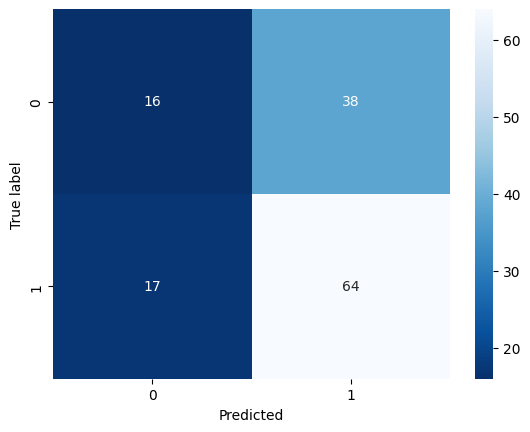

In [116]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

### Вносим изменения во входящие данные

Точность предсказания не высокая. построим матрицу корреляции - посмотрим какие признаки мультиколлинеарны и уберем их

In [117]:
ferma_0 = ferma_main.copy()
ferma = ferma_0.merge(ferma_dad, on='id', how='left')

['удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'жирность%', 'белок%']


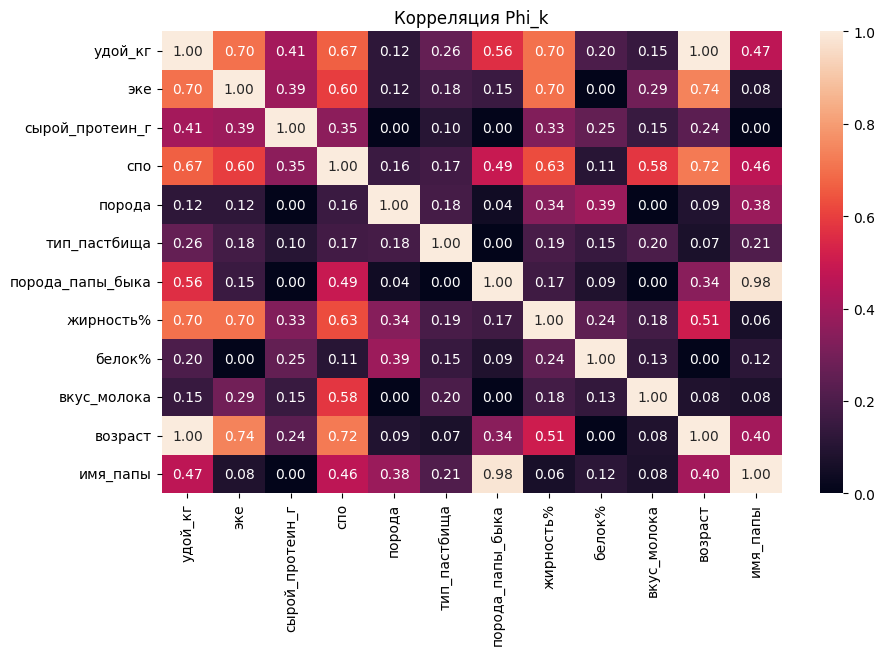

In [118]:
plt.figure(figsize=(10,6))
num_cols =  ferma.select_dtypes(include='number').columns.drop('id').to_list()
print(num_cols)
# interval_cols=[*num_cols]
fig = sns.heatmap(ferma.loc[:, ferma.columns !='id'].phik_matrix(interval_cols=[*num_cols]), annot=True, fmt='.2f') 
fig.set_title('Корреляция Phi_k')
plt.show()

Убираем признак Имя_папы

In [119]:
ferma = ferma.drop('имя_папы', axis=1)

Убираем признак эке_2

In [120]:
# ferma = ferma.drop('эке_2', axis=1)

In [121]:
ferma.head()

id  удой_кг                  эке  сырой_протеин_г                  спо  \
0   1     5863                14.20             1743                 0.89   
1   2     5529                12.80             2138                 0.89   
2   3     5810                14.00             1854                 0.89   
3   4     5895                12.40             2012                 0.89   
4   5     5302                12.80             1675                 0.89   

            порода тип_пастбища порода_папы_быка            жирность%  \
0   Вис Бик Айдиал    Равнинное           Айдиал                 3.58   
1   Вис Бик Айдиал    Равнинное          Соверин                 3.54   
2  РефлешнСоверинг    Холмистое          Соверин                 3.59   
3  РефлешнСоверинг    Холмистое           Айдиал                 3.40   
4   Вис Бик Айдиал    Равнинное          Соверин                 3.73   

                белок% вкус_молока      возраст  
0                 3.08      вкусно  более_2_лет  
1                 3.08      вкусно  менее_2_лет  
2                 3.07   не вкусно  более_2_лет  
3                 3.08   не вкусно  более_2_лет  
4                 3.07      вкусно  менее_2_лет

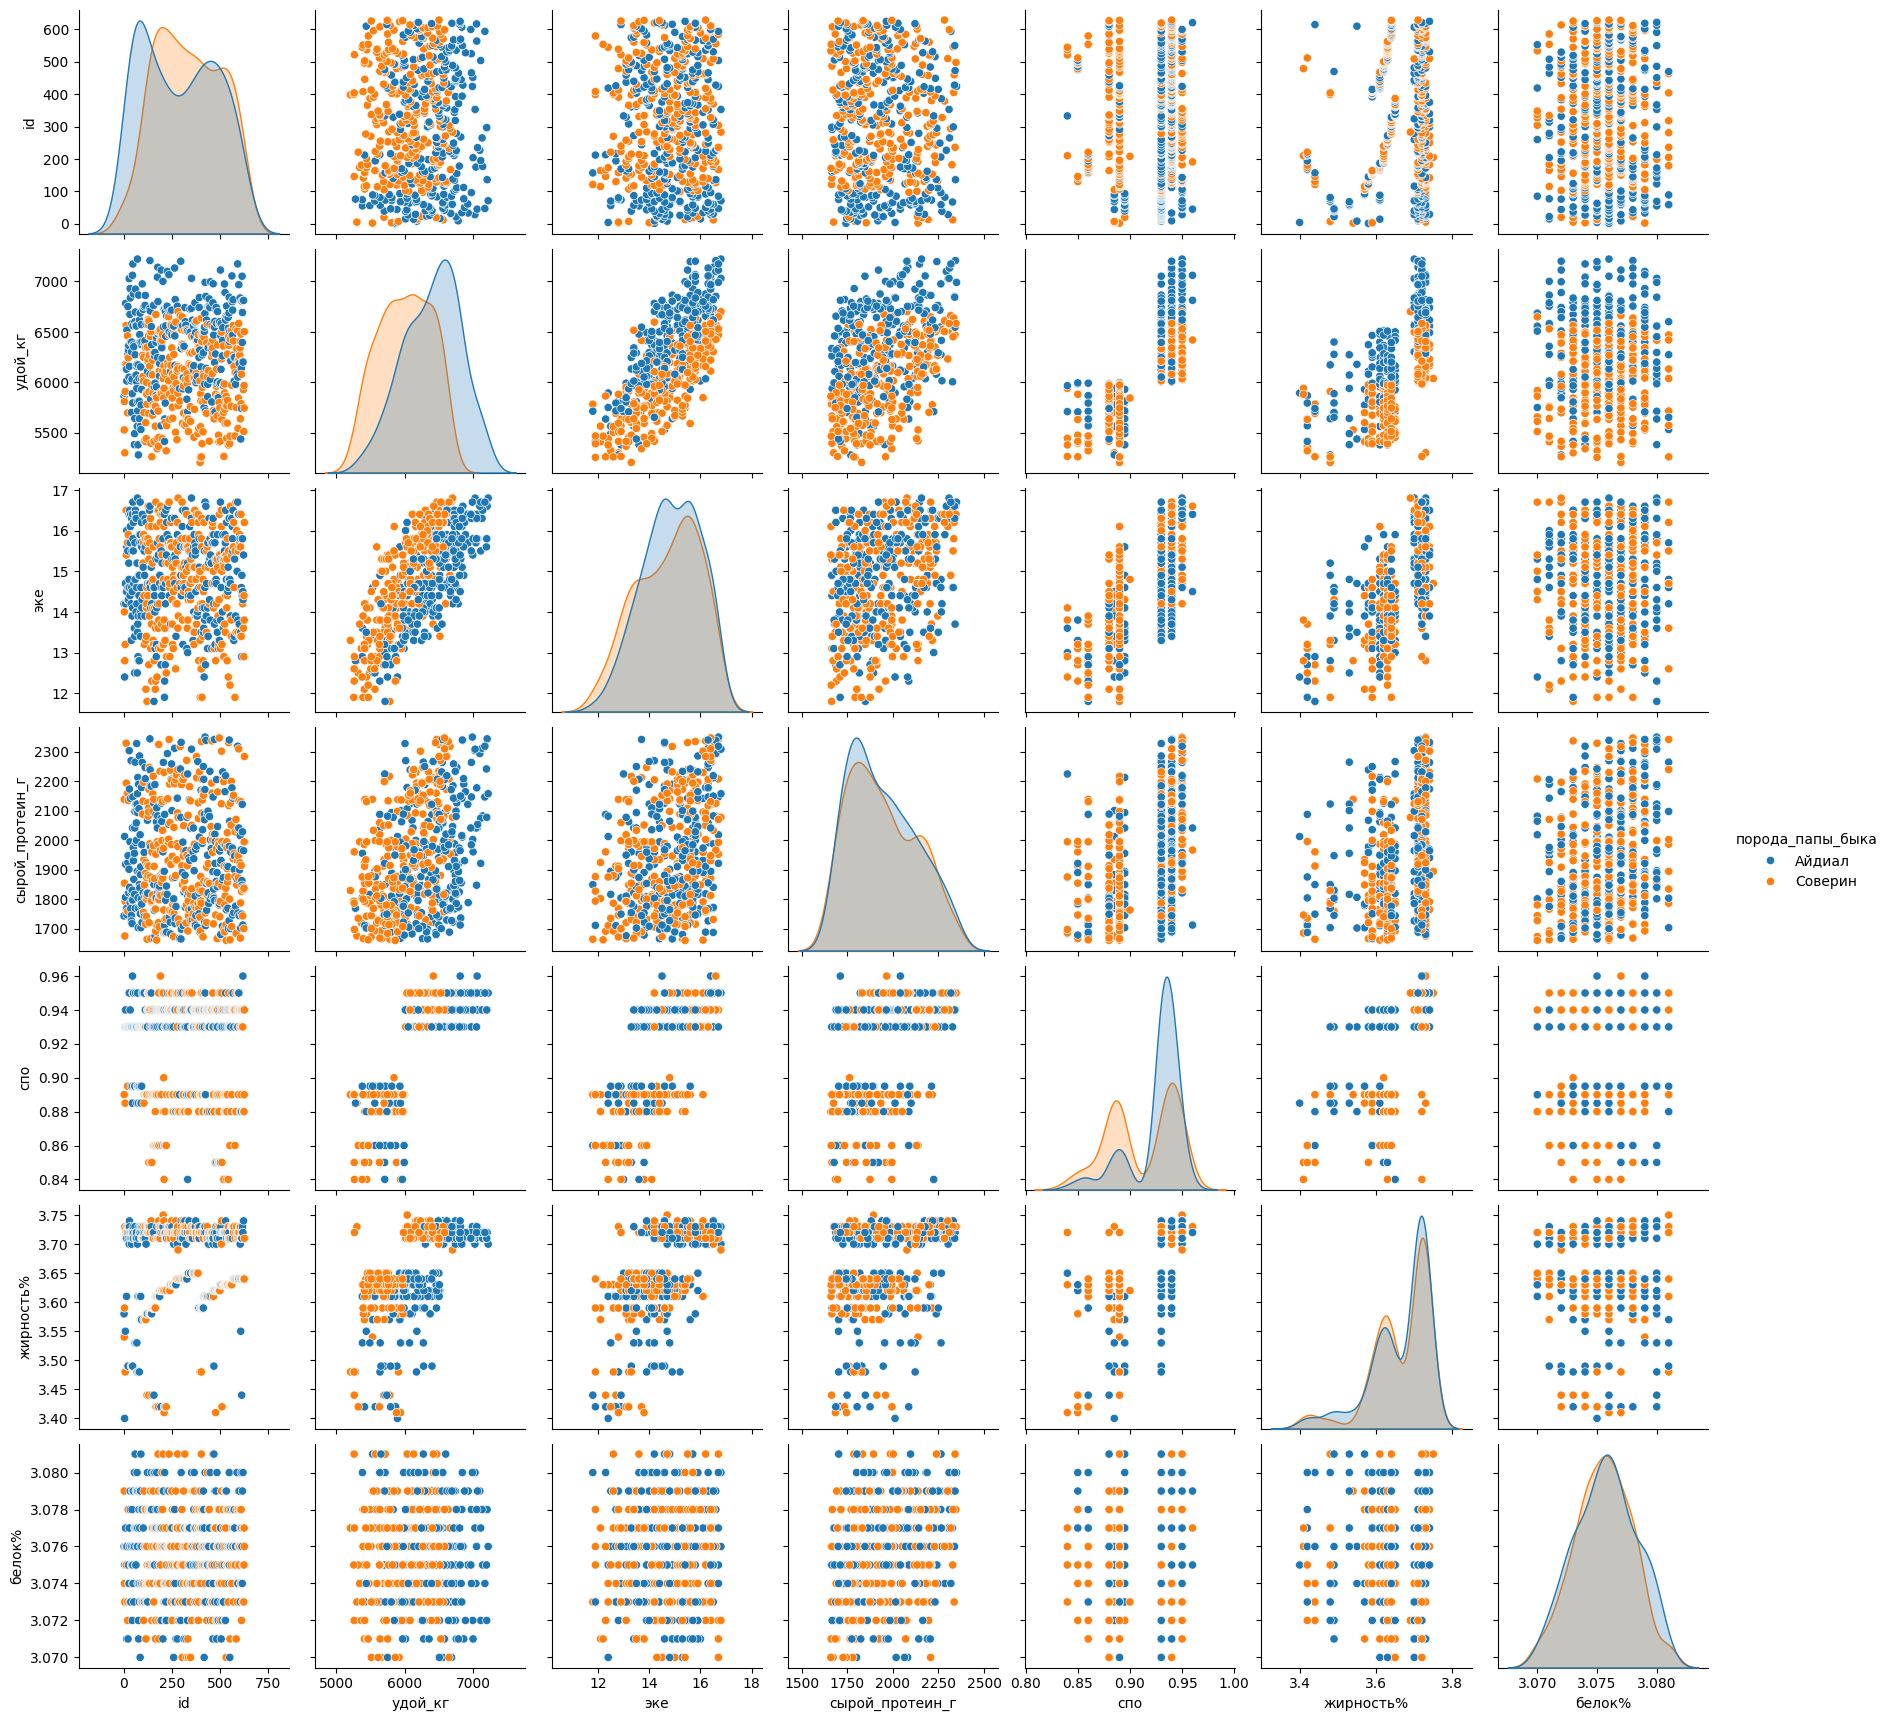

In [122]:
sns.pairplot(ferma, hue='порода_папы_быка')
plt.show()

Повторяем шаги по разделению признаков, масштабированию и кодированию

In [123]:
X = ferma.drop(columns=['удой_кг', 'вкус_молока', 'id'])
X.head()
y  = ferma['вкус_молока']

In [124]:
le = LabelEncoder()
ferma['вкус'] = 1 - le.fit_transform(y)
display(ferma[['вкус_молока', 'вкус']].head())
y = ferma['вкус']

вкус_молока  вкус
0      вкусно     1
1      вкусно     1
2   не вкусно     0
3   не вкусно     0
4      вкусно     1

In [125]:
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state=RANDOM_STATE)

In [126]:
num_col_names =  X_train.select_dtypes(include='number').columns.to_list()
num_col_names

['эке', 'сырой_протеин_г', 'спо', 'жирность%', 'белок%']

In [127]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [128]:
X_train_scaled

эке      сырой_протеин_г                  спо  \
0                   1.28                 2.21                 0.73   
1                   0.77                 0.34                 0.73   
2                   0.36                -0.71                 0.40   
3                  -0.74                 0.29                -0.92   
4                   0.36                -0.67                 0.40   
..                   ...                  ...                  ...   
398                -1.15                -0.32                -1.09   
399                 0.86                -0.34                 1.06   
400                -0.23                 0.60                -1.25   
401                 0.44                -0.06                 0.73   
402                 0.77                -0.15                 0.40   

               жирность%               белок%  
0                   0.62                 1.86  
1                   0.62                 0.21  
2                   0.74                -1.44  
3                  -0.52                 0.21  
4                   0.87                -0.62  
..                   ...                  ...  
398                -0.65                 1.45  
399                 0.87                -0.62  
400                -0.27                 1.45  
401                -0.40                -1.03  
402                 0.87                -0.20  

[403 rows x 5 columns]

In [129]:
cat_col_names = X_train.select_dtypes(exclude='number').columns.to_list()
cat_col_names
print(X_train[cat_col_names].nunique())

порода              2
тип_пастбища        2
порода_папы_быка    2
возраст             2
dtype: int64


In [130]:
# encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder = OneHotEncoder(drop='first', sparse_output=False)
print(cat_col_names)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
# encoder_col_names = encoder.get_feature_names_out()
encoder_col_names = encoder.get_feature_names_out(input_features=cat_col_names)

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']


Объединяем числовые и категориальные данные

In [131]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [132]:
X_train

порода_РефлешнСоверинг  тип_пастбища_Холмистое  порода_папы_быка_Соверин  \
0                      1.00                    1.00                      0.00   
1                      0.00                    1.00                      1.00   
2                      1.00                    0.00                      0.00   
3                      1.00                    0.00                      1.00   
4                      0.00                    0.00                      0.00   
..                      ...                     ...                       ...   
398                    0.00                    1.00                      0.00   
399                    0.00                    0.00                      1.00   
400                    1.00                    1.00                      1.00   
401                    0.00                    0.00                      0.00   
402                    0.00                    0.00                      1.00   

     возраст_менее_2_лет                  эке      сырой_протеин_г  \
0                   0.00                 1.28                 2.21   
1                   0.00                 0.77                 0.34   
2                   0.00                 0.36                -0.71   
3                   0.00                -0.74                 0.29   
4                   0.00                 0.36                -0.67   
..                   ...                  ...                  ...   
398                 1.00                -1.15                -0.32   
399                 0.00                 0.86                -0.34   
400                 0.00                -0.23                 0.60   
401                 0.00                 0.44                -0.06   
402                 0.00                 0.77                -0.15   

                     спо            жирность%               белок%  
0                   0.73                 0.62                 1.86  
1                   0.73                 0.62                 0.21  
2                   0.40                 0.74                -1.44  
3                  -0.92                -0.52                 0.21  
4                   0.40                 0.87                -0.62  
..                   ...                  ...                  ...  
398                -1.09                -0.65                 1.45  
399                 1.06                 0.87                -0.62  
400                -1.25                -0.27                 1.45  
401                 0.73                -0.40                -1.03  
402                 0.40                 0.87                -0.20  

[403 rows x 9 columns]

In [133]:
X_test.columns.to_list()

['порода_РефлешнСоверинг',
 'тип_пастбища_Холмистое',
 'порода_папы_быка_Соверин',
 'возраст_менее_2_лет',
 'эке',
 'сырой_протеин_г',
 'спо',
 'жирность%',
 'белок%']

Кодируем целевой признак

In [134]:
# y_train = np.where(y_train=='вкусно', 1, 0)
# y_test = np.where(y_test=='вкусно', 1, 0)

In [135]:
clf = LogisticRegression()

In [136]:
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1])

In [137]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('accuracy: ',round(accuracy,3))
print('precision: ',round(precision,3))
print('recall: ',round(recall ,3))

accuracy:  0.563
precision:  0.583
recall:  0.789


Построим матрицу ошибок

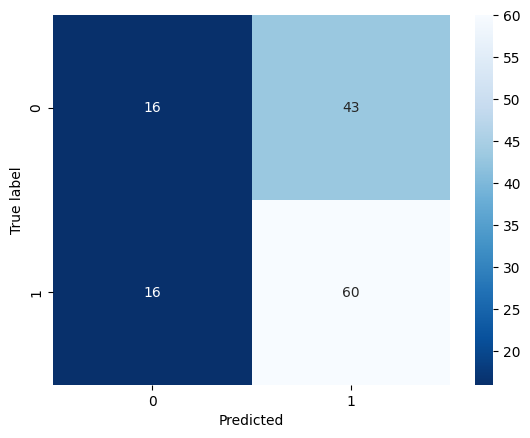

In [138]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

### Анализ модели логистической регрессии

С учетом матрицы ошибок проанализируем модель.

Фермеру важнее не ошибиться с выбором коровы - для этого лучше недооценить корову, чем переоценить - то есть минимизировать ошибку 1 рода, а значит нужно максимизировать показатель precision
Для этой цели будем менять порог

In [139]:
y_proba = clf.predict_proba(X_test)[:,1]
# y_proba
# data = pd.DataFrame(zip(y_test, y_proba),
#              columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)
data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba'])

print(data.head(10)) 

   y_valid              y_proba
0        0                 0.65
1        0                 0.60
2        1                 0.87
3        1                 0.63
4        0                 0.66
5        1                 0.58
6        1                 0.79
7        1                 0.59
8        1                 0.42
9        0                 0.38


In [140]:
thresholds = [round(i,2) for i in np.linspace(0.1, 1, num = 20, endpoint=False)]
print(thresholds) 

[0.1, 0.15, 0.19, 0.24, 0.28, 0.32, 0.37, 0.42, 0.46, 0.5, 0.55, 0.6, 0.64, 0.68, 0.73, 0.77, 0.82, 0.86, 0.91, 0.96]


In [141]:
# # создаём переменную, которая будет хранить список новых колонок
# columns = []
# #thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 4,endpoint=False)]
# # добавьте столбцы с новыми предсказаниями в таблицу
# for i in thresholds:
# 	columns.append('y_pred_'+str(i))
# 	data['y_pred_'+str(i)] = data['y_proba'].apply(lambda y_proba: 1 if y_proba >= i else 0)

# # выведем 5 случайных строк
# data.sample(10)

Подбор порога

In [142]:
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba),
columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False) 
data

y_valid              y_proba
52         1                 0.91
2          1                 0.87
90         1                 0.86
14         1                 0.86
105        1                 0.85
..       ...                  ...
117        1                 0.36
21         0                 0.33
17         0                 0.30
32         1                 0.27
47         1                 0.27

[135 rows x 2 columns]

In [143]:
# Корректировка подсказания подели в зависимости от порога предсказания
def custom_predict(X, threshold):
    probs = clf.predict_proba(X) 
    return (probs[:, 1] > threshold).astype(int)

In [144]:
# Вывод показателей модели и матрицы ошибок
def indicators(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print('accuracy =',round(accuracy,3))
    print('precision =',round(precision,3))
    print('recall =',round(recall ,3))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted');

accuracy = 0.511
precision = 1.0
recall = 0.132


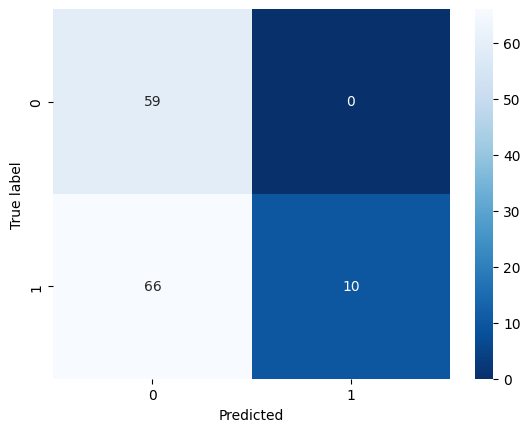

In [145]:
y_pred_threshold = custom_predict(X=X_test, threshold=0.82) 
indicators(y_test, y_pred_threshold)

In [146]:
# indicators(y_test, y_pred_threshold)

In [147]:
# Отрисовка и поиск оптимальногоп порогового значения для минимизации ошибки 1 рода.
# def grafic_acc_prec_rec(X_test, y_test):
#     acc = []
#     prec = []
#     rec = []
#     for i in range(0, 100):
#         # y_pred_threshold = custom_predict(X=X_test, threshold=i/100)
#         y_pred_threshold = (clf.predict_proba(X_test)[:, 1] > i/100).astype(int)
#         accuracy = accuracy_score(y_test, y_pred_threshold )
#         acc.append(accuracy)
#         precision = precision_score(y_test, y_pred_threshold)
#         prec.append(precision)
#         recall = recall_score(y_test, y_pred_threshold)
#         rec.append(recall)
#         # print(i/100, accuracy, precision)

#     fig, ax = plt.subplots(figsize=(10, 5))
#     _ = sns.lineplot(x=[i/100 for i in range(100)], y=acc, size = 50, 
#                         legend=True, ax=ax, color='red')
#     sns.lineplot(x=[i/100 for i in range(100)], y=prec, size = 50, 
#                         legend=False, ax=ax, color='green')
#     sns.lineplot(x=[i/100 for i in range(100)], y=rec, size = 50, 
#                         legend=False, ax=ax, color='blue')
#     plt.ylabel('accuracy, precision, recall')
#     plt.xlabel('Порог')
#     plt.title('Зависимость метрик accuracy, precision, recall от порога');
    
#     plt.axhline(max(prec), color='green')
#     for i in range (100):
#         if prec[i] == max(prec):
#             xval = i/100
#     plt.axvline(xval, color='green')
#     print('Порог:', xval, '/ Максимальное значение precision:', max(prec).round(2), 
#             '/ accuracy:', round(acc[int(xval*100)], 2),
#             '/ recall:', round(rec[int(xval*100)], 2),)

Сведение критической ошибки к нулю

In [148]:
# grafic_ac?_prec_rec(X_test, y_test)

In [149]:
# prec = []
# acc = []
# rec = []
# for i in range(100):
#     # print(custom_predict(X=X_test, threshold=i/100))
#     y_pred_threshold = custom_predict(X=X_test, threshold=i/100)
#     accuracy = accuracy_score(y_test, y_pred_threshold )
#     acc.append(accuracy)
#     precision = precision_score(y_test, y_pred_threshold)
#     prec.append(precision)
#     recall = recall_score(y_test, y_pred_threshold)
#     rec.append(recall)
#     # print(i/100, accuracy, precision)

# fig, ax = plt.subplots(figsize=(10, 5))
# _ = sns.lineplot(x=[i/100 for i in range(100)], y=acc, size = 50, 
#                     legend=False, ax=ax, color='red')
# sns.lineplot(x=[i/100 for i in range(100)], y=prec, size = 50, 
#                     legend=False, ax=ax, color='green')
# sns.lineplot(x=[i/100 for i in range(100)], y=rec, size = 50, 
#                     legend=False, ax=ax, color='blue')
# plt.ylabel('accuracy, precision, recall')
# plt.xlabel('Порог')
# plt.title('Зависимость метрик accuracy, precision, recall от порога');

~~Оптимальнее всего для минимизации ошибки 1 рода выбрать пороговым значением 0,76~~


Воспользуюсь готовым функционалом precision_recall_curve

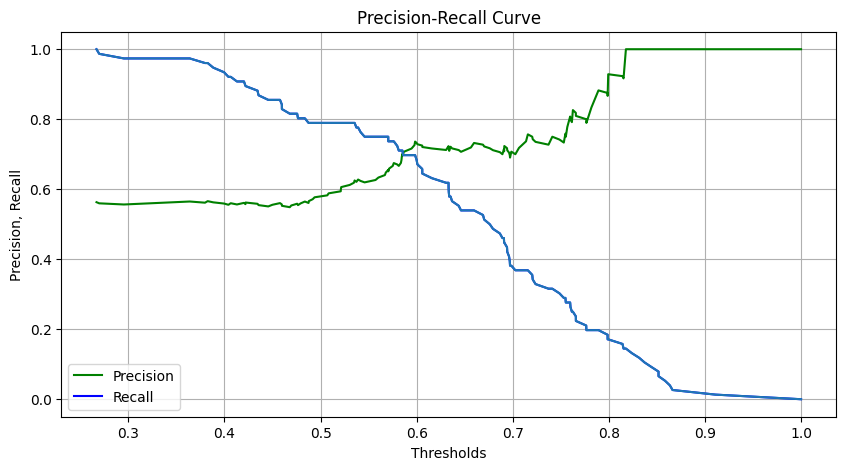

In [150]:
y_score = clf.predict_proba(X_test)[:, 1 ]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
thresholds = np.append(thresholds, 1)
#create precision recall curve
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(thresholds, precision, color='g')
ax.plot(thresholds, recall, color='b')
#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision, Recall')
ax.set_xlabel('Thresholds')
ax.plot(thresholds, recall)
ax.legend(['Precision', 'Recall'])
ax.grid()
#display plot
plt.show() 

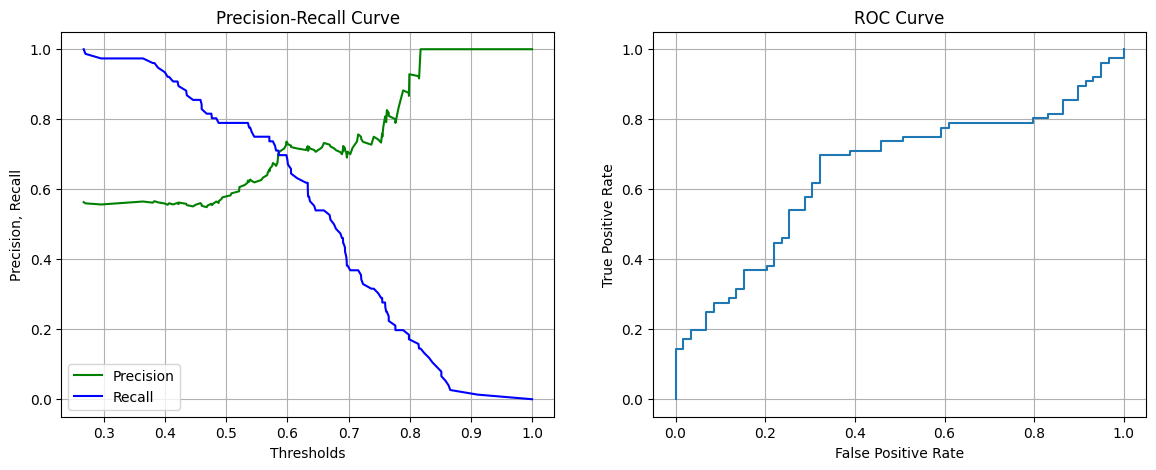

In [151]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
y_score = clf.predict_proba(X_test)[:, 1 ]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
thresholds = np.append(thresholds, 1)
#create precision recall curve
axes[0].plot(thresholds, precision, color='g')
axes[0].plot(thresholds, recall, color='b')
#add axis labels to plot
axes[0].set_title('Precision-Recall Curve')
axes[0].set_ylabel('Precision, Recall')
axes[0].set_xlabel('Thresholds')
# ax.plot(thresholds, recall)
axes[0].legend(['Precision', 'Recall'])
axes[0].grid()

y_pred_proba = clf.predict_proba (X_test)[::,1]
fpr, tpr, _ = roc_curve (y_test, y_pred_proba)
#create ROC curve
axes[1].plot(fpr,tpr)
axes[1].set_title('ROC Curve')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlabel('False Positive Rate')
axes[1].grid()
plt.show() 

### Выводы

Оптимальным будет взять порог = 0.82.
При этом accuracy = 0.511,  precision = 1.0,  recall = 0.132.

### Прогноз вкуса молока

In [152]:
buy = cow_buy.copy()

In [153]:
buy.head()

порода тип_пастбища порода_папы_быка  имя_папы  \
0   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    Равнинное          Соверин    Буйный   
2  РефлешнСоверинг    Равнинное          Соверин     Барин   
3  РефлешнСоверинг    Холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    Равнинное           Айдиал    Буйный   

     текущая_жирность%  текущий_уровень_белок%      возраст  
0                 3.58                    3.08  более_2_лет  
1                 3.54                    3.08  менее_2_лет  
2                 3.59                    3.07  более_2_лет  
3                 3.40                    3.06  более_2_лет  
4                 3.64                    3.07  более_2_лет

Считаем средние показетли по корму, добавляем в датасет buy

In [154]:
mean_eke = (ferma_main['эке'].mean() * 1.05).round(2)
mean_protein = (ferma_main['сырой_протеин_г'].mean() * 1.05).round(2)
mean_spo = (ferma_main['спо'].mean() * 1.05).round(2)
buy['эке'] = mean_eke
buy['сырой_протеин_г'] = mean_protein
buy['спо'] = mean_spo

In [155]:
buy.head()

порода тип_пастбища порода_папы_быка  имя_папы  \
0   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    Равнинное          Соверин    Буйный   
2  РефлешнСоверинг    Равнинное          Соверин     Барин   
3  РефлешнСоверинг    Холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    Равнинное           Айдиал    Буйный   

     текущая_жирность%  текущий_уровень_белок%      возраст  \
0                 3.58                    3.08  более_2_лет   
1                 3.54                    3.08  менее_2_лет   
2                 3.59                    3.07  более_2_лет   
3                 3.40                    3.06  более_2_лет   
4                 3.64                    3.07  более_2_лет   

                   эке      сырой_протеин_г                  спо  
0                15.52              2040.48                 0.96  
1                15.52              2040.48                 0.96  
2                15.52              2040.48                 0.96  
3                15.52              2040.48                 0.96  
4                15.52              2040.48                 0.96

Приводим названия типа пастбища к обученной модели

In [156]:
buy['тип_пастбища'] = buy['тип_пастбища'].replace('равнинное', 'Равнинное')
buy['тип_пастбища'] = buy['тип_пастбища'].replace('холмистое', 'Холмистое')

In [157]:
buy.head()

порода тип_пастбища порода_папы_быка  имя_папы  \
0   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    Равнинное          Соверин    Буйный   
2  РефлешнСоверинг    Равнинное          Соверин     Барин   
3  РефлешнСоверинг    Холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    Равнинное           Айдиал    Буйный   

     текущая_жирность%  текущий_уровень_белок%      возраст  \
0                 3.58                    3.08  более_2_лет   
1                 3.54                    3.08  менее_2_лет   
2                 3.59                    3.07  более_2_лет   
3                 3.40                    3.06  более_2_лет   
4                 3.64                    3.07  более_2_лет   

                   эке      сырой_протеин_г                  спо  
0                15.52              2040.48                 0.96  
1                15.52              2040.48                 0.96  
2                15.52              2040.48                 0.96  
3                15.52              2040.48                 0.96  
4                15.52              2040.48                 0.96

Приводим Входящие данные в вид пригодный для прогноза:

In [158]:
buy =  buy.drop('имя_папы', axis=1)

In [159]:
X = buy

In [160]:
X.head()

порода тип_пастбища порода_папы_быка    текущая_жирность%  \
0   Вис Бик Айдиал    Холмистое           Айдиал                 3.58   
1   Вис Бик Айдиал    Равнинное          Соверин                 3.54   
2  РефлешнСоверинг    Равнинное          Соверин                 3.59   
3  РефлешнСоверинг    Холмистое           Айдиал                 3.40   
4  РефлешнСоверинг    Равнинное           Айдиал                 3.64   

   текущий_уровень_белок%      возраст                  эке  \
0                    3.08  более_2_лет                15.52   
1                    3.08  менее_2_лет                15.52   
2                    3.07  более_2_лет                15.52   
3                    3.06  более_2_лет                15.52   
4                    3.07  более_2_лет                15.52   

       сырой_протеин_г                  спо  
0              2040.48                 0.96  
1              2040.48                 0.96  
2              2040.48                 0.96  
3              2040.48                 0.96  
4              2040.48                 0.96

In [161]:
X.rename(columns = {'текущая_жирность%':'жирность%', 'текущий_уровень_белок%':'белок%'}, inplace = True )

In [162]:
num_col_names =  X.select_dtypes(include='number').columns.to_list()
num_col_names

['жирность%', 'белок%', 'эке', 'сырой_протеин_г', 'спо']

Порядок должен быть таков:

эке,	сырой_протеин_г,	спо,	жирность%,	белок%

In [163]:
X_scaled = scaler.transform(X[['эке', 'сырой_протеин_г', 'спо', 'жирность%', 'белок%']])
X_scaled = pd.DataFrame(X_scaled, columns=['эке', 'сырой_протеин_г', 'спо', 'жирность%', 'белок%'])

In [164]:
X_scaled

эке      сырой_протеин_г                  спо  \
0                  0.62                 0.55                 1.39   
1                  0.62                 0.55                 1.39   
2                  0.62                 0.55                 1.39   
3                  0.62                 0.55                 1.39   
4                  0.62                 0.55                 1.39   
5                  0.62                 0.55                 1.39   
6                  0.62                 0.55                 1.39   
7                  0.62                 0.55                 1.39   
8                  0.62                 0.55                 1.39   
9                  0.62                 0.55                 1.39   
10                 0.62                 0.55                 1.39   
11                 0.62                 0.55                 1.39   
12                 0.62                 0.55                 1.39   
13                 0.62                 0.55                 1.39   
14                 0.62                 0.55                 1.39   
15                 0.62                 0.55                 1.39   
16                 0.62                 0.55                 1.39   
17                 0.62                 0.55                 1.39   
18                 0.62                 0.55                 1.39   
19                 0.62                 0.55                 1.39   

              жирность%               белок%  
0                 -1.03                 0.21  
1                 -1.54                 2.27  
2                 -0.90                -0.62  
3                 -3.31                -5.98  
4                 -0.27                -0.62  
5                 -0.40                -9.29  
6                 -1.03                 0.21  
7                 -1.16                 1.45  
8                 -0.90                -0.62  
9                 -3.31                 1.45  
10                 0.87                -8.46  
11                 0.87                -1.03  
12                 0.24               -12.18  
13                -3.06                -0.20  
14                -0.90                -0.62  
15                -3.31                -4.33  
16                 0.87                 1.45  
17                 1.38                -9.29  
18                -4.07                -2.68  
19                -0.27                -0.62

In [165]:
cat_col_names = X.select_dtypes(exclude='number').columns.to_list()
cat_col_names
print(X[cat_col_names].nunique())

порода              2
тип_пастбища        2
порода_папы_быка    2
возраст             2
dtype: int64


In [166]:
X_ohe = encoder.transform(X[cat_col_names])
# encoder_col_names = encoder.get_feature_names_out()
encoder_col_names = encoder.get_feature_names_out(input_features=cat_col_names)

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)

Объединяем данные

In [167]:
X = pd.concat([X_ohe, X_scaled], axis=1)
X

порода_РефлешнСоверинг  тип_пастбища_Холмистое  порода_папы_быка_Соверин  \
0                     0.00                    1.00                      0.00   
1                     0.00                    0.00                      1.00   
2                     1.00                    0.00                      1.00   
3                     1.00                    1.00                      0.00   
4                     1.00                    0.00                      0.00   
5                     1.00                    0.00                      1.00   
6                     0.00                    1.00                      0.00   
7                     0.00                    0.00                      1.00   
8                     1.00                    0.00                      1.00   
9                     1.00                    1.00                      0.00   
10                    0.00                    1.00                      1.00   
11                    1.00                    0.00                      1.00   
12                    0.00                    1.00                      0.00   
13                    0.00                    1.00                      1.00   
14                    1.00                    0.00                      1.00   
15                    1.00                    1.00                      0.00   
16                    0.00                    1.00                      1.00   
17                    1.00                    0.00                      1.00   
18                    0.00                    0.00                      1.00   
19                    1.00                    0.00                      0.00   

    возраст_менее_2_лет                  эке      сырой_протеин_г  \
0                  0.00                 0.62                 0.55   
1                  1.00                 0.62                 0.55   
2                  0.00                 0.62                 0.55   
3                  0.00                 0.62                 0.55   
4                  0.00                 0.62                 0.55   
5                  1.00                 0.62                 0.55   
6                  0.00                 0.62                 0.55   
7                  0.00                 0.62                 0.55   
8                  0.00                 0.62                 0.55   
9                  1.00                 0.62                 0.55   
10                 0.00                 0.62                 0.55   
11                 0.00                 0.62                 0.55   
12                 0.00                 0.62                 0.55   
13                 1.00                 0.62                 0.55   
14                 0.00                 0.62                 0.55   
15                 0.00                 0.62                 0.55   
16                 0.00                 0.62                 0.55   
17                 1.00                 0.62                 0.55   
18                 0.00                 0.62                 0.55   
19                 0.00                 0.62                 0.55   

                    спо            жирность%               белок%  
0                  1.39                -1.03                 0.21  
1                  1.39                -1.54                 2.27  
2                  1.39                -0.90                -0.62  
3                  1.39                -3.31                -5.98  
4                  1.39                -0.27                -0.62  
5                  1.39                -0.40                -9.29  
6                  1.39                -1.03                 0.21  
7                  1.39                -1.16                 1.45  
8                  1.39                -0.90                -0.62  
9                  1.39                -3.31                 1.45  
10                 1.39                 0.87                -8.46  
11                 1.39                 0.87             

Данные подогнаны, делаем прогноз

In [168]:
predictions = clf.predict(X)
predictions

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1])

Смотрим вероятности

In [169]:
y_proba = clf.predict_proba(X)[:,1]
y_proba

array([0.75061912, 0.85414453, 0.74110227, 0.52457603, 0.64321   ,
       0.32183484, 0.75061912, 0.8054992 , 0.74110227, 0.86227304,
       0.36154467, 0.68601285, 0.15378609, 0.85149   , 0.74110227,
       0.61193153, 0.82830548, 0.28368617, 0.6954188 , 0.64321   ])

Смотрим предсказания с пороговым значением. Пользуемся функцией custom_predict

In [170]:
predictions_threshold = custom_predict(X=X, threshold=0.83)
predictions_threshold

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

## Итоговые выводы

Добавляем в итоговый датафрейм информацию по вкусу молока

In [171]:
# buy_pred.drop('Молоко_вкусное', axis=1, inplace=True)
# buy_pred

In [172]:
buy_pred.insert(loc = len(buy_pred.columns), column='Молоко_вкусное', value=predictions_threshold)

In [173]:
buy_pred

порода тип_пастбища порода_папы_быка  имя_папы  \
0    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
1    Вис Бик Айдиал    Равнинное          Соверин    Буйный   
2   РефлешнСоверинг    Равнинное          Соверин     Барин   
3   РефлешнСоверинг    Холмистое           Айдиал    Буйный   
4   РефлешнСоверинг    Равнинное           Айдиал    Буйный   
5   РефлешнСоверинг    Равнинное          Соверин  Геркулес   
6    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
7    Вис Бик Айдиал    Равнинное          Соверин    Буйный   
8   РефлешнСоверинг    Равнинное          Соверин     Барин   
9   РефлешнСоверинг    Холмистое           Айдиал    Буйный   
10   Вис Бик Айдиал    Холмистое          Соверин  Соловчик   
11  РефлешнСоверинг    Равнинное          Соверин  Геркулес   
12   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
13   Вис Бик Айдиал    Холмистое          Соверин     Барин   
14  РефлешнСоверинг    Равнинное          Соверин     Барин   
15  РефлешнСоверинг    Холмистое           Айдиал    Буйный   
16   Вис Бик Айдиал    Холмистое          Соверин  Соловчик   
17  РефлешнСоверинг    Равнинное          Соверин  Геркулес   
18   Вис Бик Айдиал    Равнинное          Соверин    Буйный   
19  РефлешнСоверинг    Равнинное           Айдиал    Буйный   

              жирность%               белок%      возраст  \
0                  3.58                 3.08  более_2_лет   
1                  3.54                 3.08  менее_2_лет   
2                  3.59                 3.07  более_2_лет   
3                  3.40                 3.06  более_2_лет   
4                  3.64                 3.07  более_2_лет   
5                  3.63                 3.05  менее_2_лет   
6                  3.58                 3.08  более_2_лет   
7                  3.57                 3.08  более_2_лет   
8                  3.59                 3.07  более_2_лет   
9                  3.40                 3.08  менее_2_лет   
10                 3.73                 3.06  более_2_лет   
11                 3.73                 3.07  более_2_лет   
12                 3.68                 3.05  более_2_лет   
13                 3.42                 3.08  менее_2_лет   
14                 3.59                 3.07  более_2_лет   
15                 3.40                 3.06  более_2_лет   
16                 3.73                 3.08  более_2_лет   
17                 3.77                 3.05  менее_2_лет   
18                 3.34                 3.07  более_2_лет   
19                 3.64                 3.07  более_2_лет   

                    эке      сырой_протеин_г                  спо spo  \
0                 15.52              2040.48                 0.96   1   
1                 15.52              2040.48                 0.96   1   
2                 15.52              2040.48                 0.96   1   
3                 15.52              2040.48                 0.96   1   
4                 15.52              2040.48                 0.96   1   
5                 15.52              2040.48                 0.96   1   
6                 15.52              2040.48                 0.96   1   
7                 15.52              2040.48                 0.96   1   
8                 15.52              2040.48                 0.96   1   
9                 15.52              2040.48                 0.96   1   
10                15.52              2040.48                 0.96   1   
11                15.52              2040.48                 0.96   1   
12                15.52              2040.48                 0.96   1   
13                15.52              2040.48                 0.96   1   
14                15.52              2040.48                 0.96   1   
15                15.52              2040.48                 0.96   1   
16                15.52              2040.48                 0.96   1   
17                15.52              2040.48                 0.96   1   
18                15

Отбираем буренок у которых прогноз удоя > 6000 и молоко вкусное

In [174]:
buy_pred.query('Молоко_вкусное == 1 & Прогноз_удоя > 6000')

Empty DataFrame
Columns: [порода, тип_пастбища, порода_папы_быка, имя_папы, жирность%, белок%, возраст, эке, сырой_протеин_г, спо, spo, эке_2, Прогноз_удоя, Молоко_вкусное]
Index: []

Ни одна буренка не проходит по запросу. Попробую снизить порог с 0.83 до 0.8

In [175]:
predictions_threshold = custom_predict(X=X, threshold=0.8)
buy_pred.drop('Молоко_вкусное', axis=1, inplace=True)
buy_pred.insert(loc = len(buy_pred.columns), column='Молоко_вкусное', value=predictions_threshold)

In [176]:
buy_pred

порода тип_пастбища порода_папы_быка  имя_папы  \
0    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
1    Вис Бик Айдиал    Равнинное          Соверин    Буйный   
2   РефлешнСоверинг    Равнинное          Соверин     Барин   
3   РефлешнСоверинг    Холмистое           Айдиал    Буйный   
4   РефлешнСоверинг    Равнинное           Айдиал    Буйный   
5   РефлешнСоверинг    Равнинное          Соверин  Геркулес   
6    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
7    Вис Бик Айдиал    Равнинное          Соверин    Буйный   
8   РефлешнСоверинг    Равнинное          Соверин     Барин   
9   РефлешнСоверинг    Холмистое           Айдиал    Буйный   
10   Вис Бик Айдиал    Холмистое          Соверин  Соловчик   
11  РефлешнСоверинг    Равнинное          Соверин  Геркулес   
12   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
13   Вис Бик Айдиал    Холмистое          Соверин     Барин   
14  РефлешнСоверинг    Равнинное          Соверин     Барин   
15  РефлешнСоверинг    Холмистое           Айдиал    Буйный   
16   Вис Бик Айдиал    Холмистое          Соверин  Соловчик   
17  РефлешнСоверинг    Равнинное          Соверин  Геркулес   
18   Вис Бик Айдиал    Равнинное          Соверин    Буйный   
19  РефлешнСоверинг    Равнинное           Айдиал    Буйный   

              жирность%               белок%      возраст  \
0                  3.58                 3.08  более_2_лет   
1                  3.54                 3.08  менее_2_лет   
2                  3.59                 3.07  более_2_лет   
3                  3.40                 3.06  более_2_лет   
4                  3.64                 3.07  более_2_лет   
5                  3.63                 3.05  менее_2_лет   
6                  3.58                 3.08  более_2_лет   
7                  3.57                 3.08  более_2_лет   
8                  3.59                 3.07  более_2_лет   
9                  3.40                 3.08  менее_2_лет   
10                 3.73                 3.06  более_2_лет   
11                 3.73                 3.07  более_2_лет   
12                 3.68                 3.05  более_2_лет   
13                 3.42                 3.08  менее_2_лет   
14                 3.59                 3.07  более_2_лет   
15                 3.40                 3.06  более_2_лет   
16                 3.73                 3.08  более_2_лет   
17                 3.77                 3.05  менее_2_лет   
18                 3.34                 3.07  более_2_лет   
19                 3.64                 3.07  более_2_лет   

                    эке      сырой_протеин_г                  спо spo  \
0                 15.52              2040.48                 0.96   1   
1                 15.52              2040.48                 0.96   1   
2                 15.52              2040.48                 0.96   1   
3                 15.52              2040.48                 0.96   1   
4                 15.52              2040.48                 0.96   1   
5                 15.52              2040.48                 0.96   1   
6                 15.52              2040.48                 0.96   1   
7                 15.52              2040.48                 0.96   1   
8                 15.52              2040.48                 0.96   1   
9                 15.52              2040.48                 0.96   1   
10                15.52              2040.48                 0.96   1   
11                15.52              2040.48                 0.96   1   
12                15.52              2040.48                 0.96   1   
13                15.52              2040.48                 0.96   1   
14                15.52              2040.48                 0.96   1   
15                15.52              2040.48                 0.96   1   
16                15.52              2040.48                 0.96   1   
17                15.52              2040.48                 0.96   1   
18                15

Еще раз отбираем

In [177]:
buy_pred.query('Молоко_вкусное == 1 & Прогноз_удоя > 6000')

порода тип_пастбища порода_папы_быка  имя_папы  \
7   Вис Бик Айдиал    Равнинное          Соверин    Буйный   
16  Вис Бик Айдиал    Холмистое          Соверин  Соловчик   

              жирность%               белок%      возраст  \
7                  3.57                 3.08  более_2_лет   
16                 3.73                 3.08  более_2_лет   

                    эке      сырой_протеин_г                  спо spo  \
7                 15.52              2040.48                 0.96   1   
16                15.52              2040.48                 0.96   1   

                  эке_2         Прогноз_удоя  Молоко_вкусное  
7                240.87              6421.01               1  
16               240.87              6358.00               1

### Результаты работы моделей

С минимальным риском фермер может купить 2 коровы из датасета выше. Было сделано 2 прогноза. Согласно параметру Удоя 17 буренок в списке отвечают заданным требованиям (больше 6000 л в год). По вкусу молока была сделана логистическая регрессия и подобран пороговое значение 0,83 при котором сведена к минимуму ошибка 1 рода - минимизировано ошибочное присвоение признака Вкусное молоко коровам в исконной выборке. Но при таком пороге ни одна будернка не соответтвует условию. Вкусное молоко только у коров, которые дают меньше 6000 л в год. Поэтому порог был немного понижен до 0.8 - при таком условии отвечает требованиям фермера 2 коровы в списке выше.


### Выводы о моделях
Для улучшения регрессионной модели было сделано 3 варианта модели и выборана модель с наибольшей точностью. Были введеные дополнительные признаки - квадрат ЭКЕ, переведен в категориальный признак показатель СПО. Итоговый коэффициент детерминации наилучшей модели - 80%. Для дальнейшего повышения точности можно попробовать добавить полиноминальные коэффициенты. Так же в датасете, который представлен для прогнозирования лучше использовать реальные показатели по кормам - сейчас используются усредненные по тренировочной выборке
При анализе рисков и экономический расчетом нужно определиться что важнее - наиболее точно определить целевую характеристику (и допустить, что могут быть пропущены некоторые из объектов) или наиболее полно получить список объектов с требуемой характеристикой (но допустить что среди отобранных объектов могут быть ошибочно отобранные). В данном случае фермеру важно не количество, а качество, поэтому добиваемся высокого показателя precision.
